In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [3]:
data=pd.read_csv('latest_delhi.csv')

#### DATA PREPROCESSING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         43824 non-null  object 
 1   PM2.5 (µg/m³)     41918 non-null  float64
 2   PM10 (µg/m³)      41795 non-null  float64
 3   NO (µg/m³)        41434 non-null  float64
 4   NO2 (µg/m³)       41670 non-null  float64
 5   NOx (ppb)         41627 non-null  float64
 6   NH3 (µg/m³)       41583 non-null  float64
 7   SO2 (µg/m³)       40083 non-null  float64
 8   CO (mg/m³)        40544 non-null  float64
 9   Ozone (µg/m³)     41719 non-null  float64
 10  temp              43824 non-null  float64
 11  feelslike         43824 non-null  float64
 12  dew               43824 non-null  float64
 13  humidity          43824 non-null  float64
 14  precip            43824 non-null  float64
 15  precipprob        43824 non-null  int64  
 16  snow              38216 non-null  float6

##### CHECKING FOR MISSING VALUES AND HANDLING IT

In [5]:
data.isnull().sum()

Timestamp              0
PM2.5 (µg/m³)       1906
PM10 (µg/m³)        2029
NO (µg/m³)          2390
NO2 (µg/m³)         2154
NOx (ppb)           2197
NH3 (µg/m³)         2241
SO2 (µg/m³)         3741
CO (mg/m³)          3280
Ozone (µg/m³)       2105
temp                   0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
snow                5608
snowdepth              0
windgust               3
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           348
solarradiation        60
solarenergy           60
uvindex               60
conditions             0
icon                   0
dtype: int64

In [6]:
### CHECKING THE PERCENTAGE OF MISSING VALUES IN EACH VARIABLE

data.isnull().sum().sort_values(ascending=False)/data.shape[0]

snow                0.127966
SO2 (µg/m³)         0.085364
CO (mg/m³)          0.074845
NO (µg/m³)          0.054536
NH3 (µg/m³)         0.051136
NOx (ppb)           0.050132
NO2 (µg/m³)         0.049151
Ozone (µg/m³)       0.048033
PM10 (µg/m³)        0.046299
PM2.5 (µg/m³)       0.043492
visibility          0.007941
uvindex             0.001369
solarenergy         0.001369
solarradiation      0.001369
windgust            0.000068
cloudcover          0.000000
Timestamp           0.000000
conditions          0.000000
winddir             0.000000
sealevelpressure    0.000000
precip              0.000000
windspeed           0.000000
snowdepth           0.000000
precipprob          0.000000
humidity            0.000000
dew                 0.000000
feelslike           0.000000
temp                0.000000
icon                0.000000
dtype: float64

<Axes: >

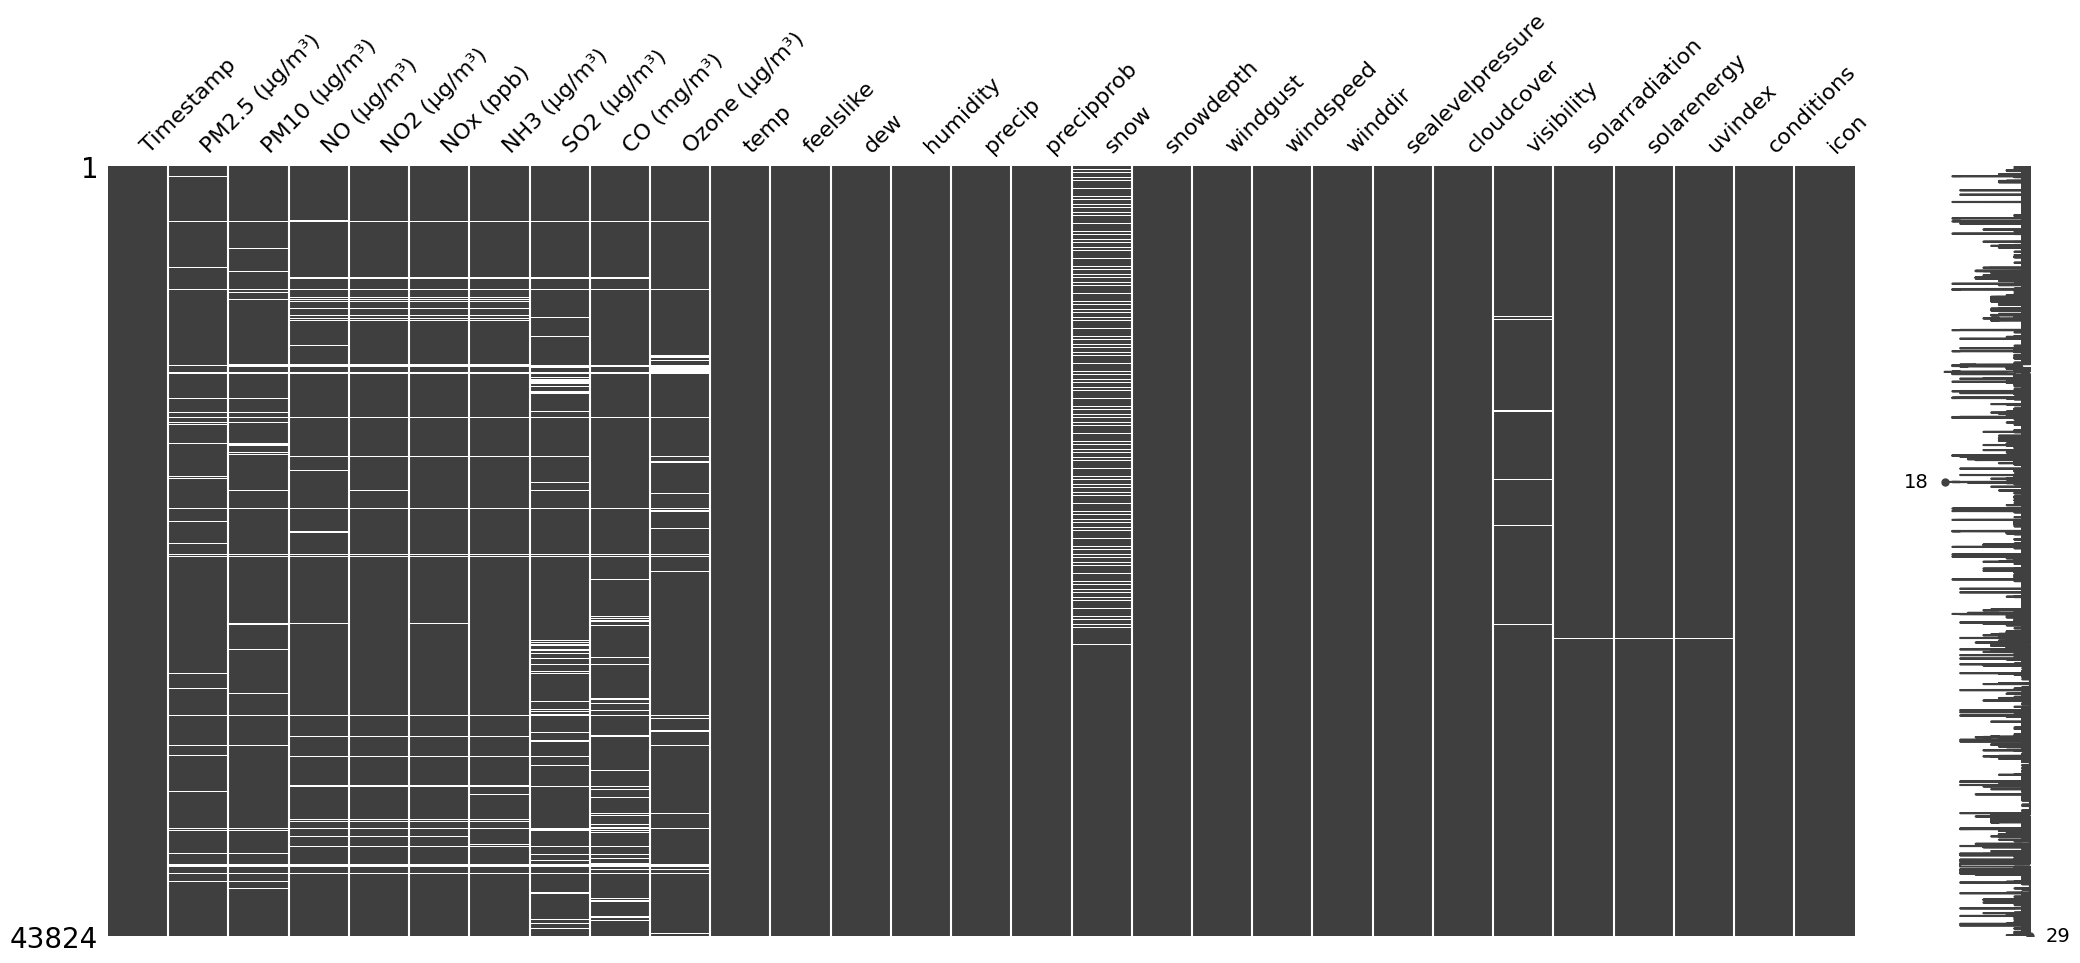

In [7]:
msno.matrix(data)


<Axes: >

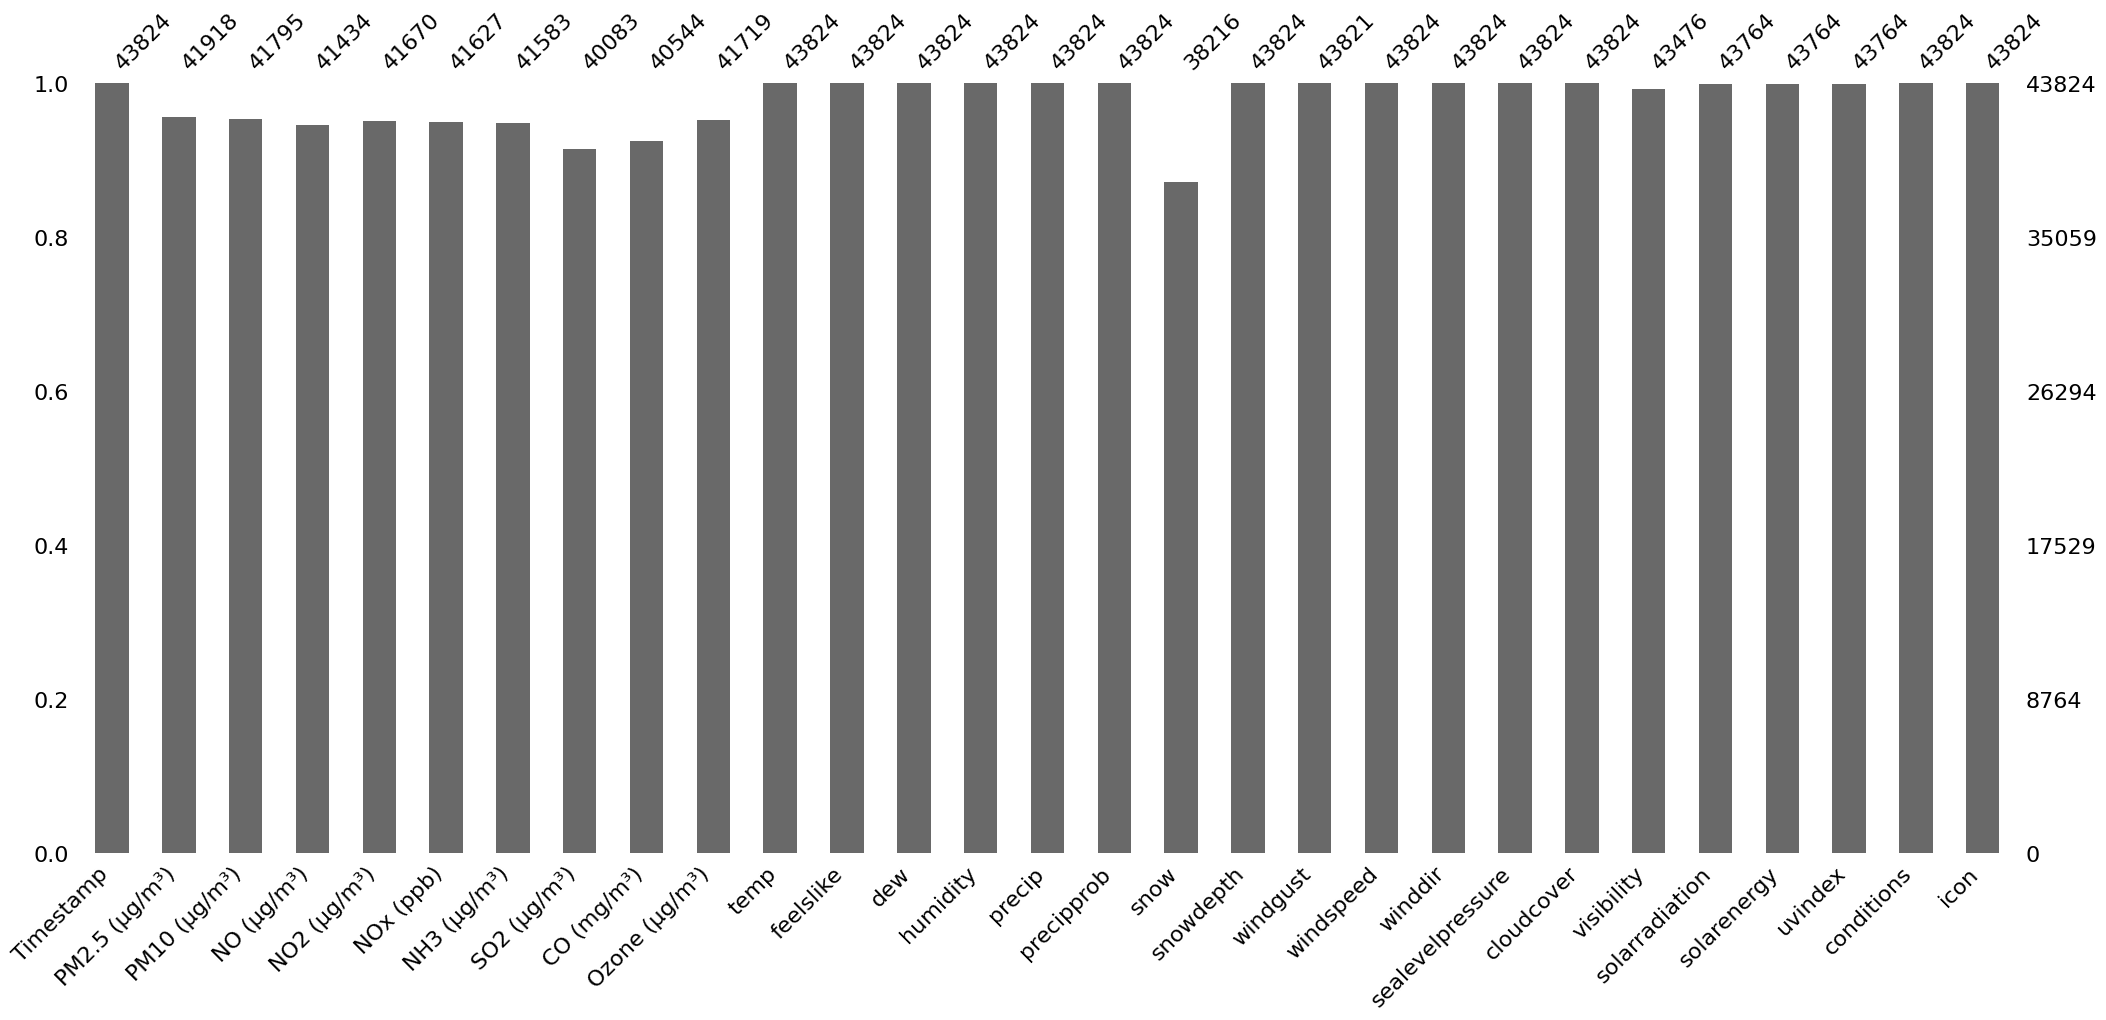

In [8]:
msno.bar(data)

In [9]:
# Converting the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y %H:%M')

# Set the 'Timestamp' column as the index as it is a time series data
#data.set_index('Timestamp', inplace=True)

# Inspect the first few rows to understand the dataset structure
data.head()

Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0 2019-01-01 00:00:00         501.25        676.50       46.60        74.92   
1 2019-01-01 01:00:00         521.25        647.50       45.90        70.80   
2 2019-01-01 02:00:00         538.50        684.75       32.15        56.85   
3 2019-01-01 03:00:00         465.25        644.50       19.08        46.40   
4 2019-01-01 04:00:00         361.00        490.75       10.92        38.00   

   NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  ...  \
0      77.85        45.67        18.33        5.60           8.23  ...   
1      75.10        46.33        21.43        5.73           8.40  ...   
2      56.35        42.30        18.80        3.25           9.45  ...   
3      40.22        44.65        18.73        2.05           7.23  ...   
4      29.12        44.35        18.60        1.65           7.57  ...   

   windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0        0.0      0.0            1020.0         0.0         1.0   
1        7.6    302.7            1021.0         0.0         NaN   
2        0.0    305.1            1021.3         0.0         1.0   
3        7.2    307.0            1021.0         0.0         NaN   
4        6.8    312.7            1021.0         0.0         NaN   

   solarradiation  solarenergy  uvindex  conditions         icon  
0             0.0          0.0      0.0       Clear  clear-night  
1             0.0          0.0      0.0       Clear  clear-night  
2             0.0          0.0      0.0       Clear  clear-night  
3             0.0          0.0      0.0       Clear  clear-night  
4             0.0          0.0      0.0       Clear  clear-night  

[5 rows x 29 columns]

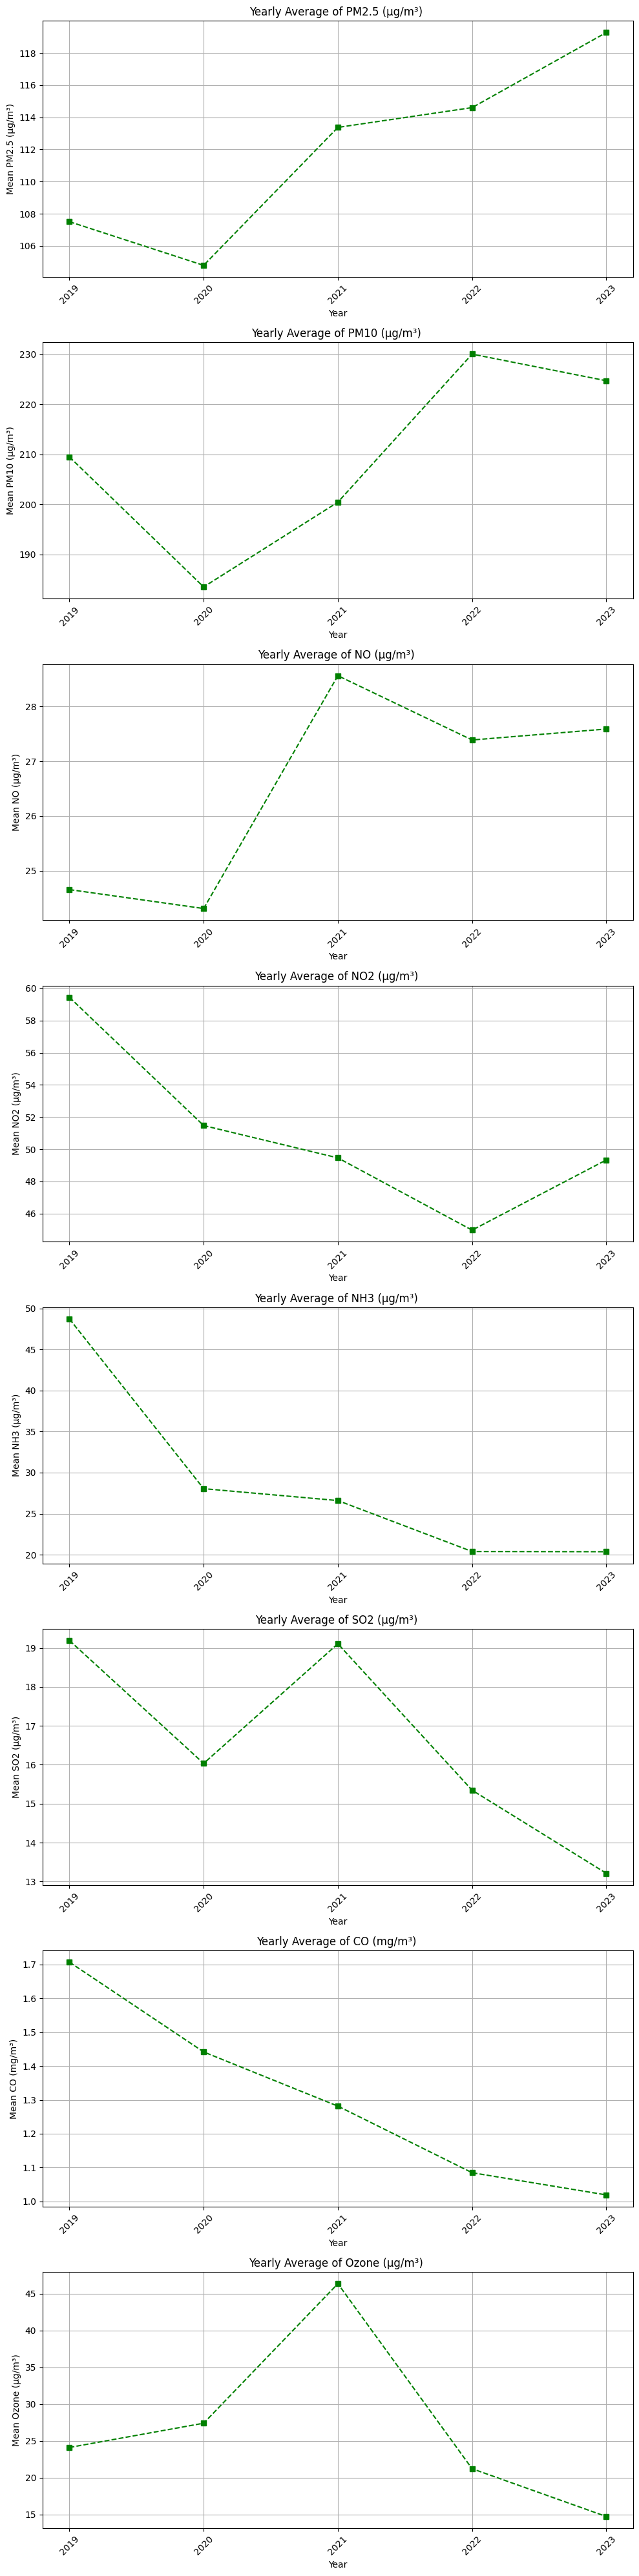

In [10]:
data_eda=data.copy()
pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
                   'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)'
                   ]

# Setting the 'Timestamp' column as the index as it is a time series data
data_eda.set_index('Timestamp', inplace=True)
# Defining the layout of subplots
num_rows = len(pollutants)
num_cols = 1

# Creating subplots with the specified layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))  

# Plotting line charts for each column against years
for i, column in enumerate(pollutants):
    mean_by_year = data_eda.groupby(data_eda.index.year)[column].mean()
    years = mean_by_year.index
    values = mean_by_year.values
    
    ax = axes[i]  
    ax.plot(years, values, marker='s', color='green', linestyle='--')  
    ax.set_title(f'Yearly Average of {column} ')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Mean {column}')
    ax.grid(True)
    ax.set_xticks(years)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  
plt.show()


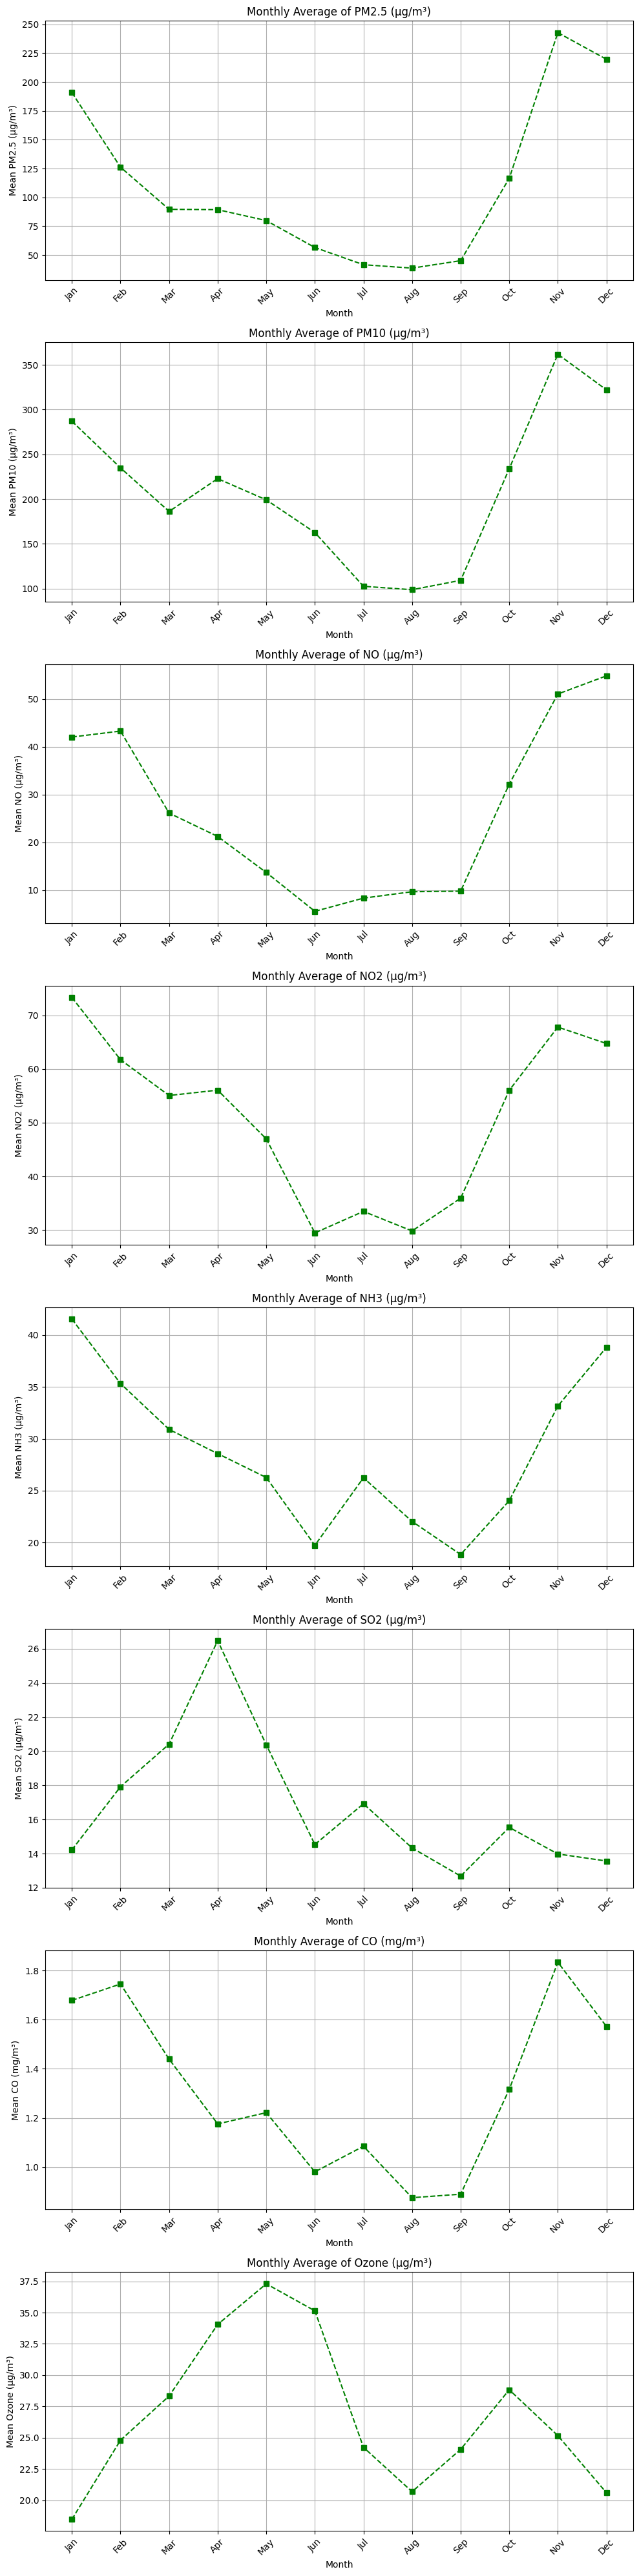

In [11]:
# Group by month and plot
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 5 * len(pollutants)))

for i, column in enumerate(pollutants):
    mean_by_month = data_eda.groupby(data_eda.index.month)[column].mean()
    months = mean_by_month.index
    values = mean_by_month.values
    
    ax = axes[i]
    ax.plot(months, values, marker='s', color='green', linestyle='--')
    ax.set_title(f'Monthly Average of {column}')
    ax.set_xlabel('Month')
    ax.set_ylabel(f'Mean {column}')
    ax.grid(True)
    ax.set_xticks(months)
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


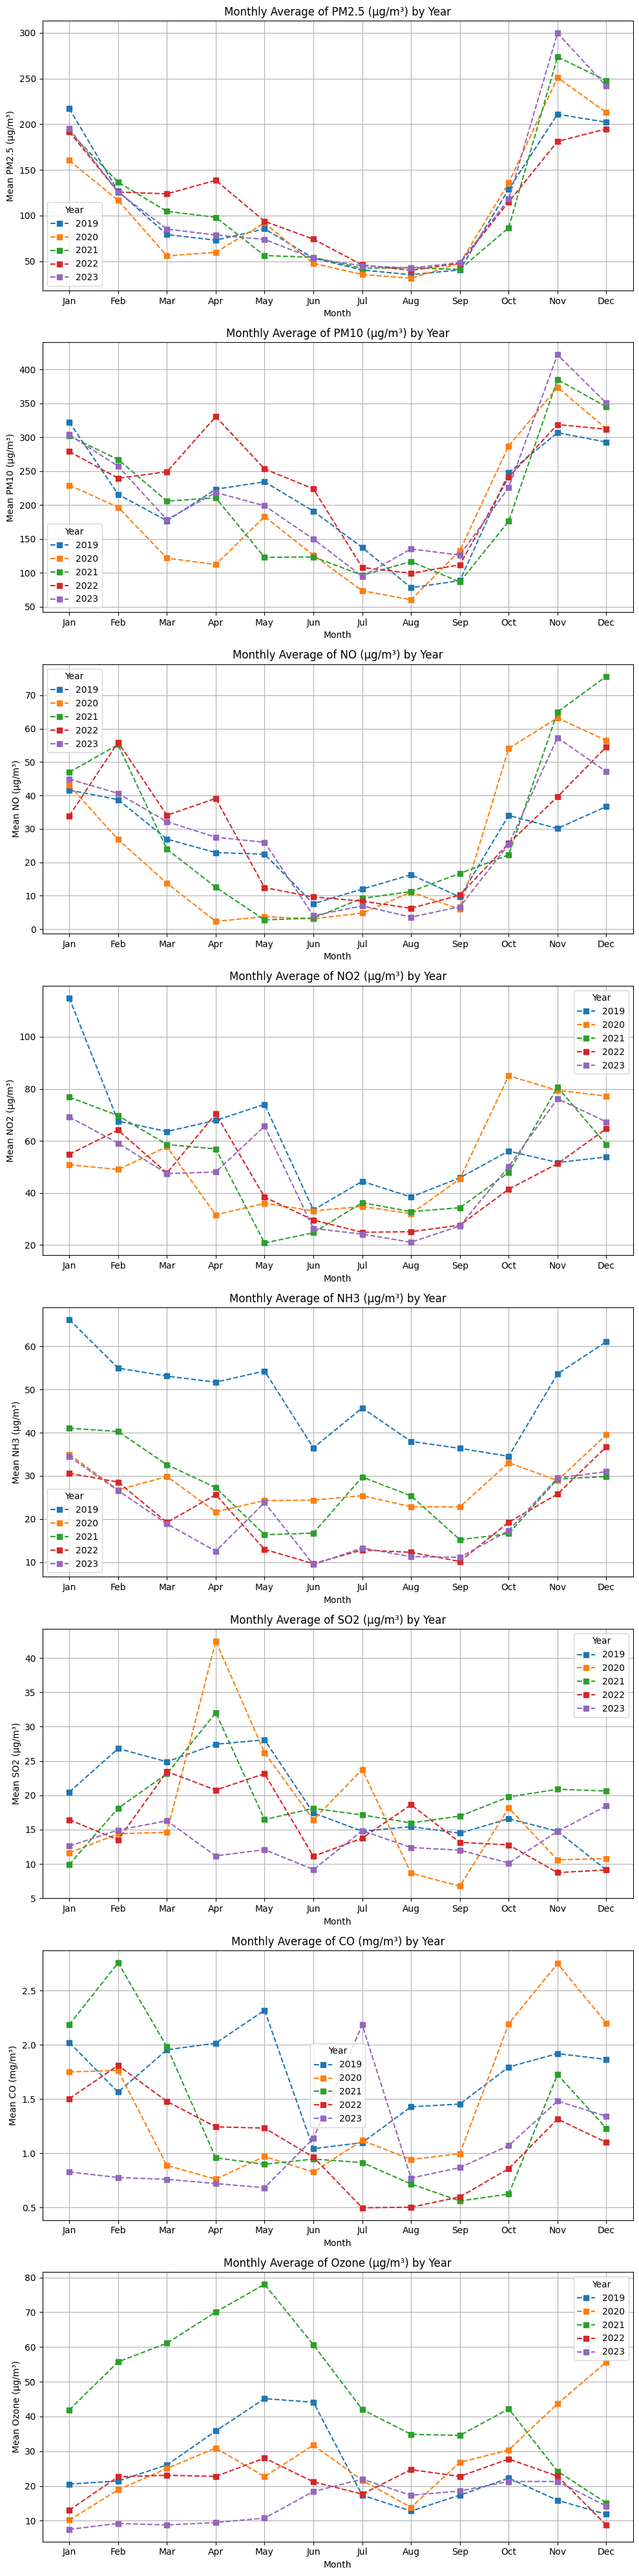

In [12]:
# Create a list of years present in the data
years = data_eda.index.year.unique()

# Defining the layout of subplots
num_rows = len(pollutants)
num_cols = 1

# Creating subplots with the specified layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

# Check if there's only one row; if so, wrap axes in a list
if num_rows == 1:
    axes = [axes]

# Plotting line charts for each column, with one line per year
for i, column in enumerate(pollutants):
    ax = axes[i]
    
    # Plot each year in a different line
    for year in years:
        # Select the data for the year
        yearly_data = data_eda[data_eda.index.year == year]
        
        # Group by month within this year
        mean_by_month = yearly_data.groupby(yearly_data.index.month)[column].mean()
        months = mean_by_month.index
        values = mean_by_month.values
        
        # Plotting
        ax.plot(months, values, marker='s', linestyle='--', label=str(year))
    
    ax.set_title(f'Monthly Average of {column} by Year')
    ax.set_xlabel('Month')
    ax.set_xticks(months)
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_ylabel(f'Mean {column}')
    ax.legend(title='Year')
    ax.grid(True)

plt.tight_layout()
plt.show()


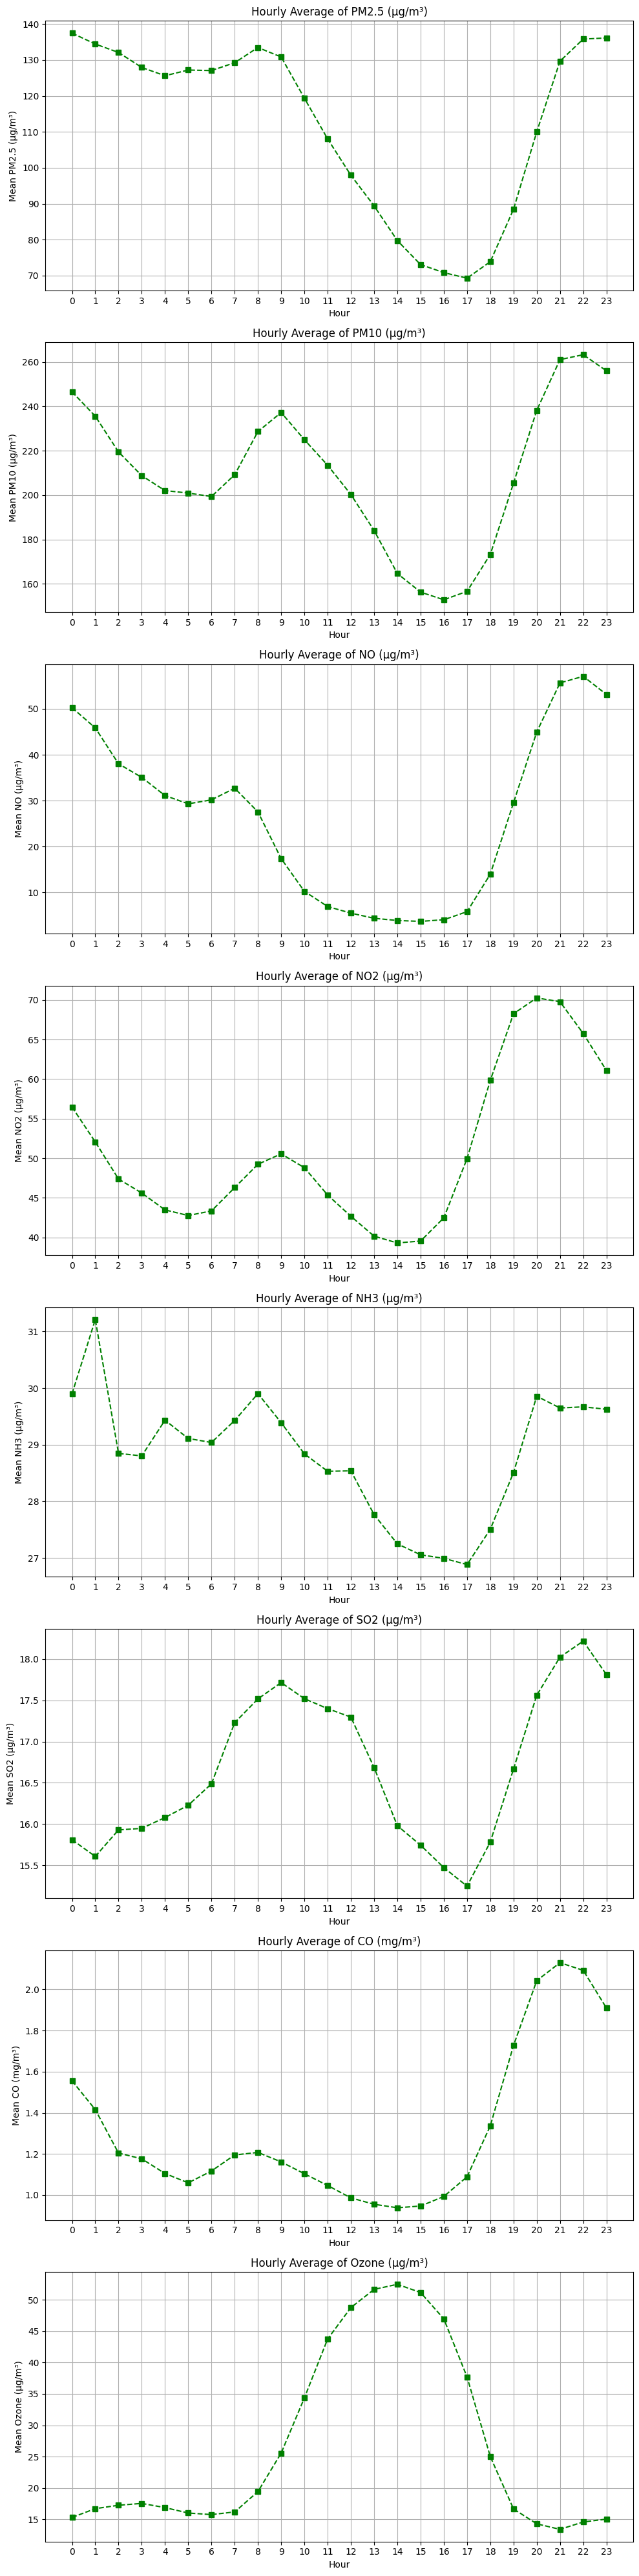

In [13]:
# Group by hour and plot
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 5 * len(pollutants)))

for i, column in enumerate(pollutants):
    mean_by_hour = data_eda.groupby(data_eda.index.hour)[column].mean()
    hours = mean_by_hour.index
    values = mean_by_hour.values
    
    ax = axes[i]
    ax.plot(hours, values, marker='s', color='green', linestyle='--')
    ax.set_title(f'Hourly Average of {column}')
    ax.set_xlabel('Hour')
    ax.set_ylabel(f'Mean {column}')
    ax.grid(True)
    ax.set_xticks(hours)
    ax.tick_params(axis='x', rotation=360)

plt.tight_layout()
plt.show()


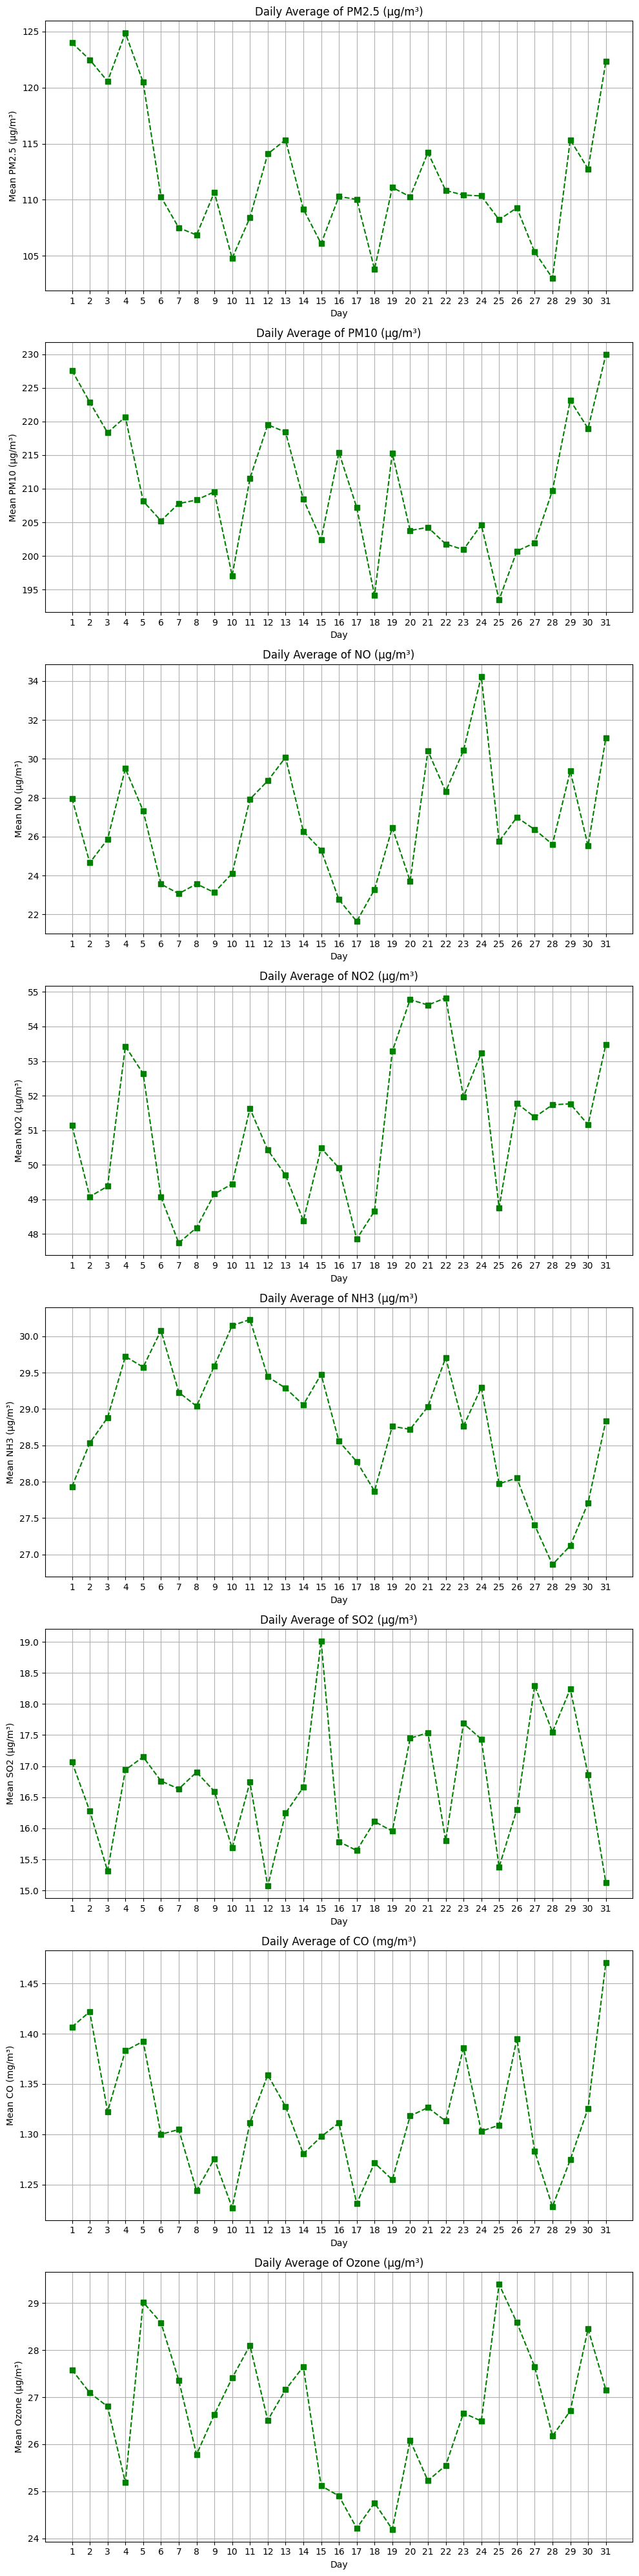

In [14]:
# Group by day and plot
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 5 * len(pollutants)))

for i, column in enumerate(pollutants):
    mean_by_day = data_eda.groupby(data_eda.index.day)[column].mean()
    days = mean_by_day.index
    values = mean_by_day.values
    
    ax = axes[i]
    ax.plot(days, values, marker='s', color='green', linestyle='--')
    ax.set_title(f'Daily Average of {column}')
    ax.set_xlabel('Day')
    ax.set_ylabel(f'Mean {column}')
    ax.grid(True)
    ax.set_xticks(days)
    ax.tick_params(axis='x', rotation=360)

plt.tight_layout()
plt.show()


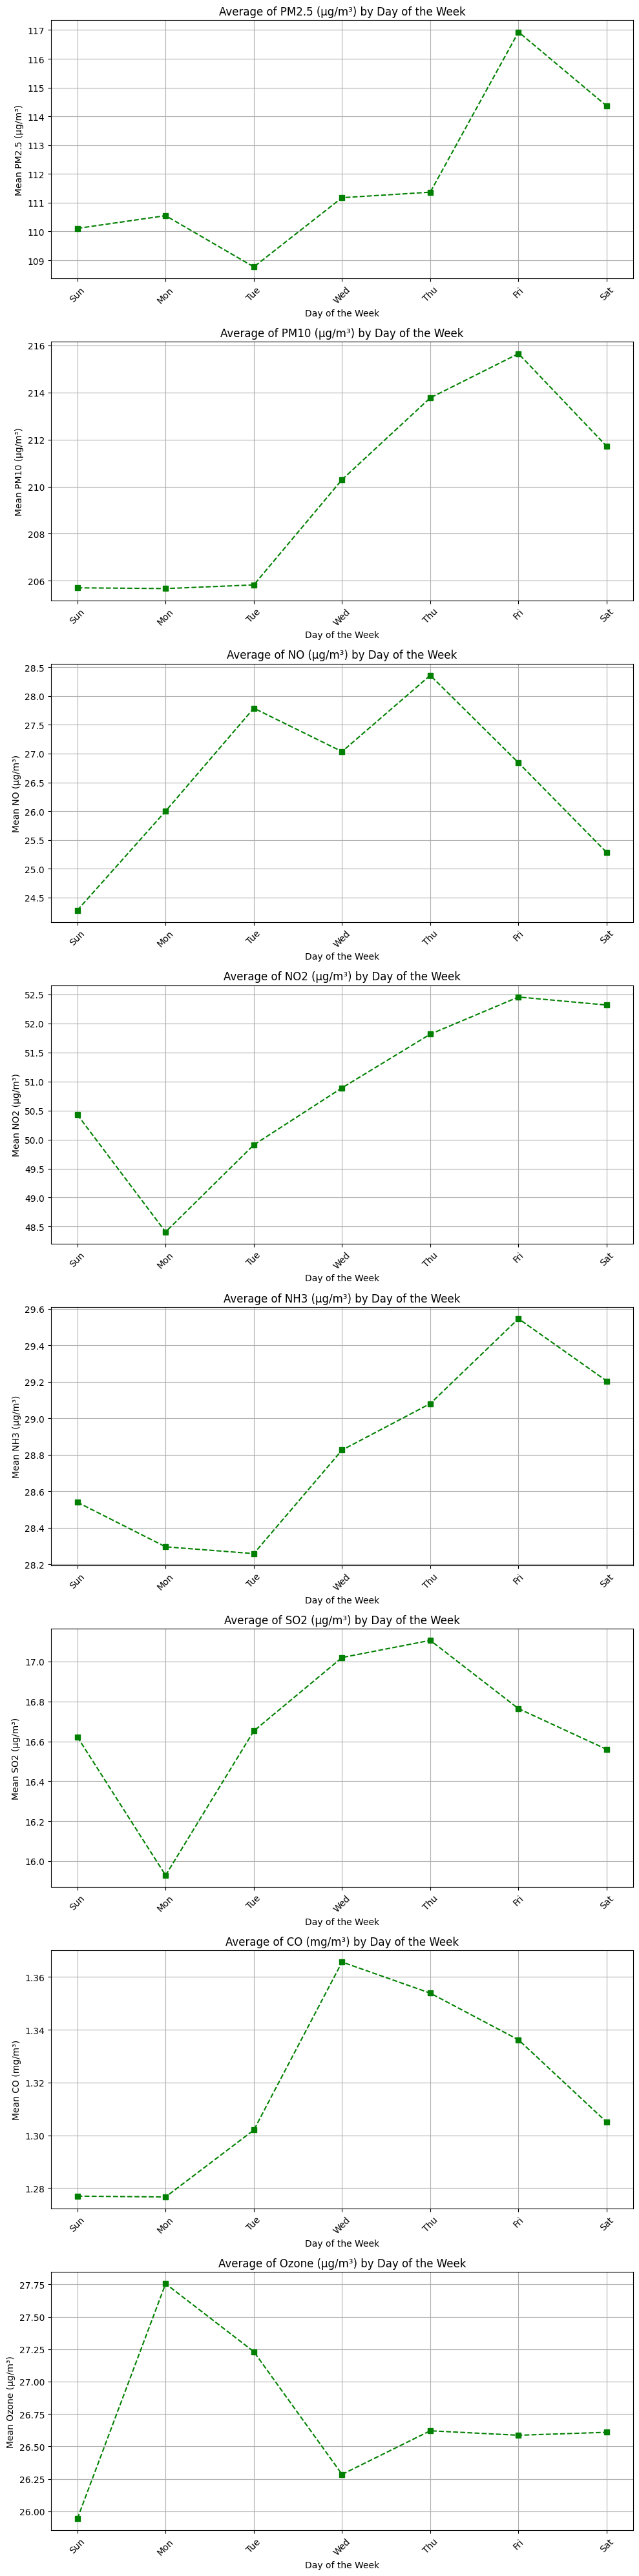

In [15]:
# Pandas day of the week is 0=Monday, to start from Sunday, we add 1 and take modulo 7
data_eda['DayOfWeek'] = (data_eda.index.dayofweek + 1) % 7  
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 5 * len(pollutants)))

for i, column in enumerate(pollutants):
    mean_by_dow = data_eda.groupby('DayOfWeek')[column].mean()
    dow = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    
    ax = axes[i]
    ax.plot(dow, mean_by_dow.loc[[6, 0, 1, 2, 3, 4, 5]].values, marker='s', color='green', linestyle='--')  # Reorder to start from Sunday
    ax.set_title(f'Average of {column} by Day of the Week')
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel(f'Mean {column}')
    ax.grid(True)
    ax.set_xticks(range(7))
    ax.set_xticklabels(dow)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [16]:
### Distribution of Weather Data

In [17]:
### Description of the dataframe before handling the missing values
data.describe()

Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)    NO (µg/m³)  \
count                43824   41918.000000  41795.000000  41434.000000   
mean   2021-07-01 23:30:00     111.910998    209.827344     26.512055   
min    2019-01-01 00:00:00       0.250000      1.000000      0.100000   
25%    2020-04-01 11:45:00      41.000000    105.250000      2.600000   
50%    2021-07-01 23:30:00      73.500000    170.250000      5.600000   
75%    2022-10-01 11:15:00     147.750000    278.750000     22.595000   
max    2023-12-31 23:00:00     992.000000    997.000000    498.100000   
std                    NaN     106.331133    145.255792     55.621836   

        NO2 (µg/m³)    NOx (ppb)   NH3 (µg/m³)   SO2 (µg/m³)    CO (mg/m³)  \
count  41670.000000  41627.00000  41583.000000  40083.000000  40544.000000   
mean      50.890299     48.69862     28.822179     16.663972      1.316679   
min        0.100000      0.10000      0.100000      0.100000      0.000000   
25%       29.150000     19.00000     17.600000      9.450000      0.620000   
50%       44.600000     30.30000     26.750000     14.570000      1.000000   
75%       64.728750     54.75000     36.790000     20.400000      1.650000   
max      375.000000    499.70000    138.900000    200.000000      9.750000   
std       31.130660     55.44162     15.790050     13.519640      1.104992   

       Ozone (µg/m³)  ...  snowdepth      windgust     windspeed  \
count   41719.000000  ...    43824.0  43821.000000  43824.000000   
mean       26.717426  ...        0.0     16.949326      7.152387   
min         0.100000  ...        0.0      0.400000      0.000000   
25%         7.880000  ...        0.0     10.400000      2.200000   
50%        14.100000  ...        0.0     15.100000      7.600000   
75%        32.000000  ...        0.0     22.000000     10.900000   
max       199.700000  ...        0.0     85.300000     63.400000   
std        30.985414  ...        0.0      8.893328      5.465817   

            winddir  sealevelpressure    cloudcover    visibility  \
count  43824.000000      43824.000000  43824.000000  43476.000000   
mean     161.055595       1008.865756     36.363089      2.734456   
min        0.000000        989.400000      0.000000      0.000000   
25%       50.000000       1003.000000      0.000000      2.000000   
50%      150.000000       1009.000000     31.800000      2.600000   
75%      270.000000       1015.000000     60.000000      3.700000   
max      360.000000       1027.000000    100.000000     24.100000   
std      117.615486          7.024897     32.869027      1.840019   

       solarradiation   solarenergy       uvindex  
count    43764.000000  43764.000000  43764.000000  
mean       214.858985      0.773202      2.125514  
min          0.000000      0.000000      0.000000  
25%          0.000000      0.000000      0.000000  
50%          9.000000      0.000000      0.000000  
75%        431.000000      1.600000      4.000000  
max       1012.000000      3.600000     10.000000  
std        291.732047      1.050531      2.939307  

[8 rows x 27 columns]

In [18]:
data.dtypes

Timestamp           datetime64[ns]
PM2.5 (µg/m³)              float64
PM10 (µg/m³)               float64
NO (µg/m³)                 float64
NO2 (µg/m³)                float64
NOx (ppb)                  float64
NH3 (µg/m³)                float64
SO2 (µg/m³)                float64
CO (mg/m³)                 float64
Ozone (µg/m³)              float64
temp                       float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
snow                       float64
snowdepth                    int64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                    float64
conditions                  object
icon                

In [19]:
data.isna().sum()

Timestamp              0
PM2.5 (µg/m³)       1906
PM10 (µg/m³)        2029
NO (µg/m³)          2390
NO2 (µg/m³)         2154
NOx (ppb)           2197
NH3 (µg/m³)         2241
SO2 (µg/m³)         3741
CO (mg/m³)          3280
Ozone (µg/m³)       2105
temp                   0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
snow                5608
snowdepth              0
windgust               3
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility           348
solarradiation        60
solarenergy           60
uvindex               60
conditions             0
icon                   0
dtype: int64

In [23]:
# Interpolating using a linear method
interpolated_data = data.interpolate(method='linear')

# Check for missing values after interpolation
missing_values_after = interpolated_data.isnull().sum()

missing_values_after


Timestamp           0
PM2.5 (µg/m³)       0
PM10 (µg/m³)        0
NO (µg/m³)          0
NO2 (µg/m³)         0
NOx (ppb)           0
NH3 (µg/m³)         0
SO2 (µg/m³)         0
CO (mg/m³)          0
Ozone (µg/m³)       0
temp                0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
conditions          0
icon                0
dtype: int64

In [21]:

interpolated_data.head()

Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0 2019-01-01 00:00:00         501.25        676.50       46.60        74.92   
1 2019-01-01 01:00:00         521.25        647.50       45.90        70.80   
2 2019-01-01 02:00:00         538.50        684.75       32.15        56.85   
3 2019-01-01 03:00:00         465.25        644.50       19.08        46.40   
4 2019-01-01 04:00:00         361.00        490.75       10.92        38.00   

   NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  ...  \
0      77.85        45.67        18.33        5.60           8.23  ...   
1      75.10        46.33        21.43        5.73           8.40  ...   
2      56.35        42.30        18.80        3.25           9.45  ...   
3      40.22        44.65        18.73        2.05           7.23  ...   
4      29.12        44.35        18.60        1.65           7.57  ...   

   windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0        0.0      0.0            1020.0         0.0         1.0   
1        7.6    302.7            1021.0         0.0         1.0   
2        0.0    305.1            1021.3         0.0         1.0   
3        7.2    307.0            1021.0         0.0         1.0   
4        6.8    312.7            1021.0         0.0         1.0   

   solarradiation  solarenergy  uvindex  conditions         icon  
0             0.0          0.0      0.0       Clear  clear-night  
1             0.0          0.0      0.0       Clear  clear-night  
2             0.0          0.0      0.0       Clear  clear-night  
3             0.0          0.0      0.0       Clear  clear-night  
4             0.0          0.0      0.0       Clear  clear-night  

[5 rows x 29 columns]

In [22]:
### Description of the dataframe after handling the missing values
interpolated_data.describe()

Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)    NO (µg/m³)  \
count                43824   43824.000000  43824.000000  43824.000000   
mean   2021-07-01 23:30:00     110.749796    209.770194     26.897840   
min    2019-01-01 00:00:00       0.250000      1.000000      0.100000   
25%    2020-04-01 11:45:00      40.750000    104.750000      2.550000   
50%    2021-07-01 23:30:00      72.750000    168.750000      5.500000   
75%    2022-10-01 11:15:00     145.000000    277.750000     22.340625   
max    2023-12-31 23:00:00     992.000000    997.000000    498.100000   
std                    NaN     105.791746    147.077128     57.582030   

        NO2 (µg/m³)     NOx (ppb)   NH3 (µg/m³)   SO2 (µg/m³)    CO (mg/m³)  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      50.800747     49.086356     28.855449     17.136706      1.316988   
min        0.100000      0.100000      0.100000      0.100000      0.000000   
25%       28.750000     18.750000     17.350000      9.350000      0.620000   
50%       44.320000     30.080000     26.700000     14.580000      1.000000   
75%       64.500000     54.800000     36.850000     20.550000      1.655000   
max      375.000000    499.700000    138.900000    200.000000      9.750000   
std       31.922426     57.333925     16.135388     15.066512      1.104279   

       Ozone (µg/m³)  ...  snowdepth      windgust     windspeed  \
count   43824.000000  ...    43824.0  43824.000000  43824.000000   
mean       27.823245  ...        0.0     16.948810      7.152387   
min         0.100000  ...        0.0      0.400000      0.000000   
25%         8.000000  ...        0.0     10.400000      2.200000   
50%        14.650000  ...        0.0     15.100000      7.600000   
75%        33.550000  ...        0.0     22.000000     10.900000   
max       199.700000  ...        0.0     85.300000     63.400000   
std        32.227708  ...        0.0      8.893269      5.465817   

            winddir  sealevelpressure    cloudcover    visibility  \
count  43824.000000      43824.000000  43824.000000  43824.000000   
mean     161.055595       1008.865756     36.363089      2.728225   
min        0.000000        989.400000      0.000000      0.000000   
25%       50.000000       1003.000000      0.000000      2.000000   
50%      150.000000       1009.000000     31.800000      2.600000   
75%      270.000000       1015.000000     60.000000      3.700000   
max      360.000000       1027.000000    100.000000     24.100000   
std      117.615486          7.024897     32.869027      1.836202   

       solarradiation   solarenergy       uvindex  
count    43824.000000  43824.000000  43824.000000  
mean       215.062000      0.773929      2.127544  
min          0.000000      0.000000      0.000000  
25%          0.000000      0.000000      0.000000  
50%          9.650000      0.000000      0.000000  
75%        431.000000      1.600000      4.000000  
max       1012.000000      3.600000     10.000000  
std        291.597225      1.050044      2.937965  

[8 rows x 27 columns]

In [24]:
interpolated_data.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'conditions', 'icon'],
      dtype='object')

In [25]:
# Checking for duplicate rows
duplicate_rows = interpolated_data[interpolated_data.duplicated()]

# Print duplicate rows
print("Duplicate Rows:", duplicate_rows.shape)

Duplicate Rows: (0, 29)


In [26]:
data_1=interpolated_data.copy()
data_1.head(10)

Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0 2019-01-01 00:00:00         501.25        676.50       46.60        74.92   
1 2019-01-01 01:00:00         521.25        647.50       45.90        70.80   
2 2019-01-01 02:00:00         538.50        684.75       32.15        56.85   
3 2019-01-01 03:00:00         465.25        644.50       19.08        46.40   
4 2019-01-01 04:00:00         361.00        490.75       10.92        38.00   
5 2019-01-01 05:00:00         342.75        464.00       11.62        36.80   
6 2019-01-01 06:00:00         336.00        450.25       10.60        34.43   
7 2019-01-01 07:00:00         316.75        424.25       10.15        34.68   
8 2019-01-01 08:00:00         325.25        440.75       11.25        38.65   
9 2019-01-01 09:00:00         353.75        505.50        9.10        48.65   

   NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  ...  \
0      77.85        45.67        18.33        5.60           8.23  ...   
1      75.10        46.33        21.43        5.73           8.40  ...   
2      56.35        42.30        18.80        3.25           9.45  ...   
3      40.22        44.65        18.73        2.05           7.23  ...   
4      29.12        44.35        18.60        1.65           7.57  ...   
5      29.03        44.25        16.95        1.60           7.93  ...   
6      26.93        44.05        17.20        1.75           7.80  ...   
7      26.72        43.50        17.80        1.63           7.80  ...   
8      29.72        43.83        18.47        2.07           8.18  ...   
9      33.25        42.85        19.25        1.97           8.20  ...   

   windspeed  winddir  sealevelpressure  cloudcover  visibility  \
0        0.0      0.0            1020.0         0.0         1.0   
1        7.6    302.7            1021.0         0.0         1.0   
2        0.0    305.1            1021.3         0.0         1.0   
3        7.2    307.0            1021.0         0.0         1.0   
4        6.8    312.7            1021.0         0.0         1.0   
5        0.0      0.0            1020.0         0.0         1.0   
6        0.0      0.0            1019.0         0.0         1.0   
7        0.0      0.0            1021.0         0.0         0.0   
8        2.6    254.0            1022.7         0.0         1.0   
9        5.4    240.0            1022.0         0.0         1.0   

   solarradiation  solarenergy  uvindex  conditions         icon  
0             0.0          0.0      0.0       Clear  clear-night  
1             0.0          0.0      0.0       Clear  clear-night  
2             0.0          0.0      0.0       Clear  clear-night  
3             0.0          0.0      0.0       Clear  clear-night  
4             0.0          0.0      0.0       Clear  clear-night  
5             0.0          0.0      0.0       Clear  clear-night  
6             0.0          0.0      0.0       Clear  clear-night  
7             0.0          0.0      0.0       Clear  clear-night  
8             1.8          0.0      0.0       Clear    clear-day  
9           101.6          0.4      1.0       Clear    clear-day  

[10 rows x 29 columns]

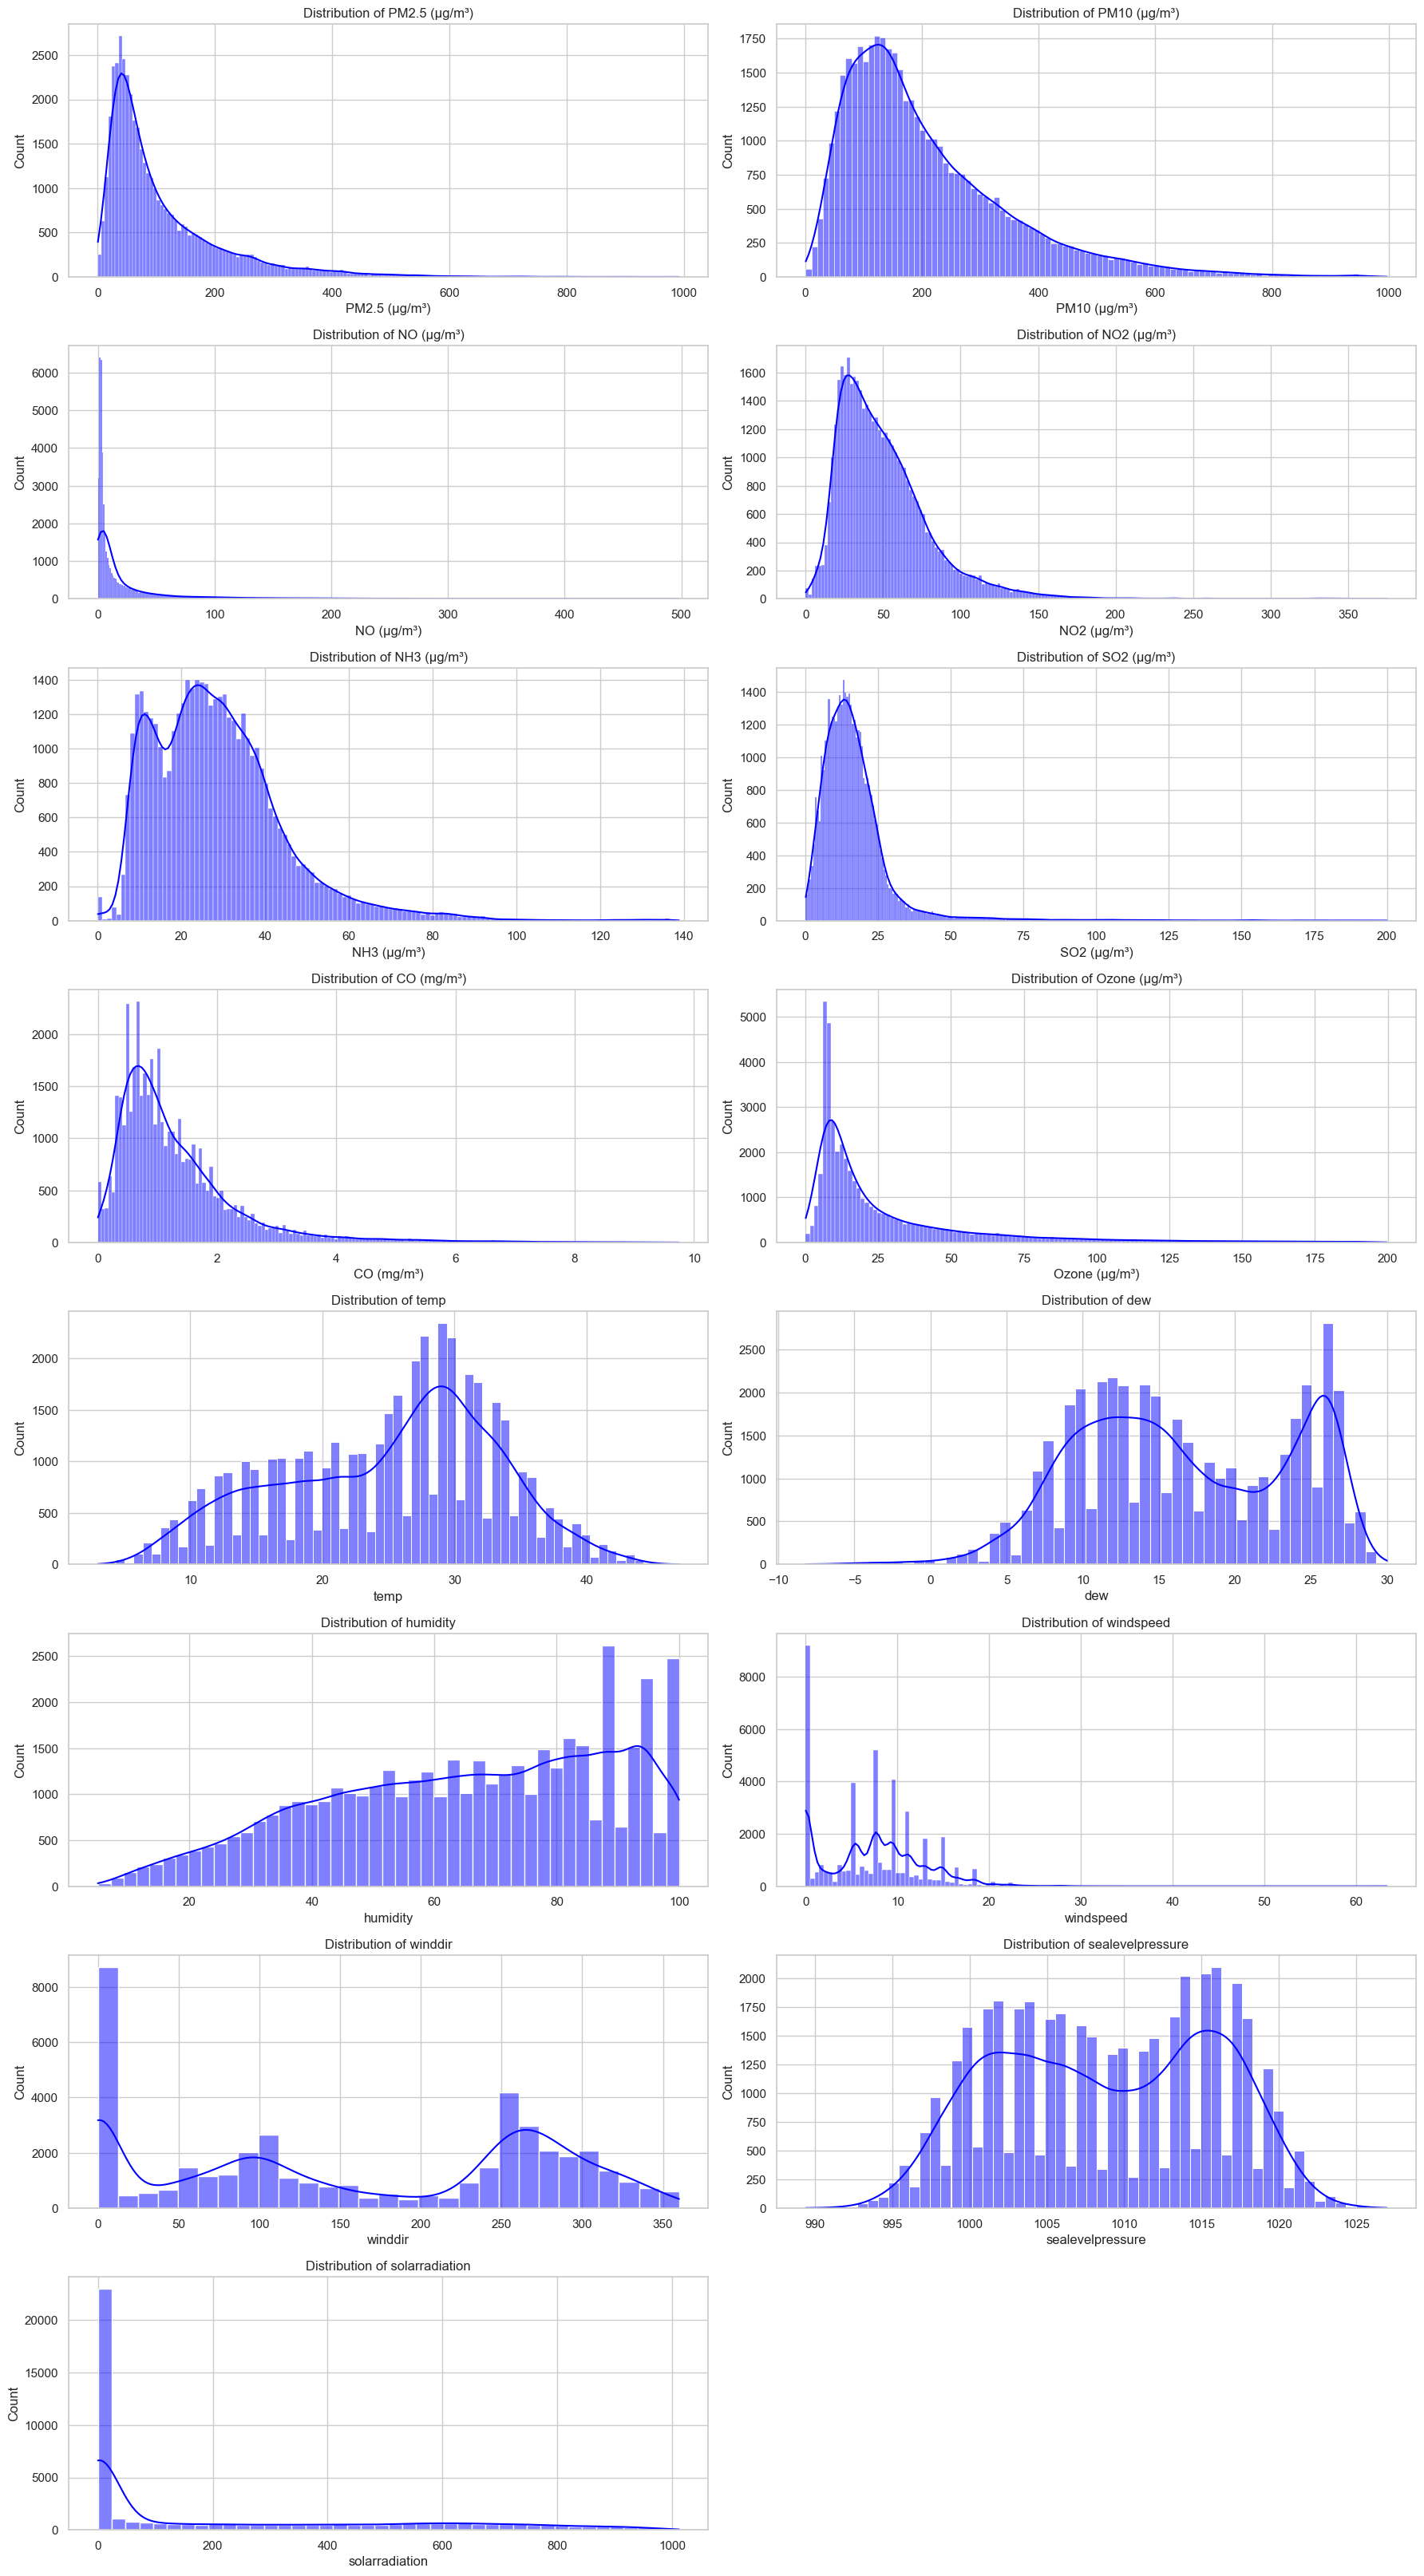

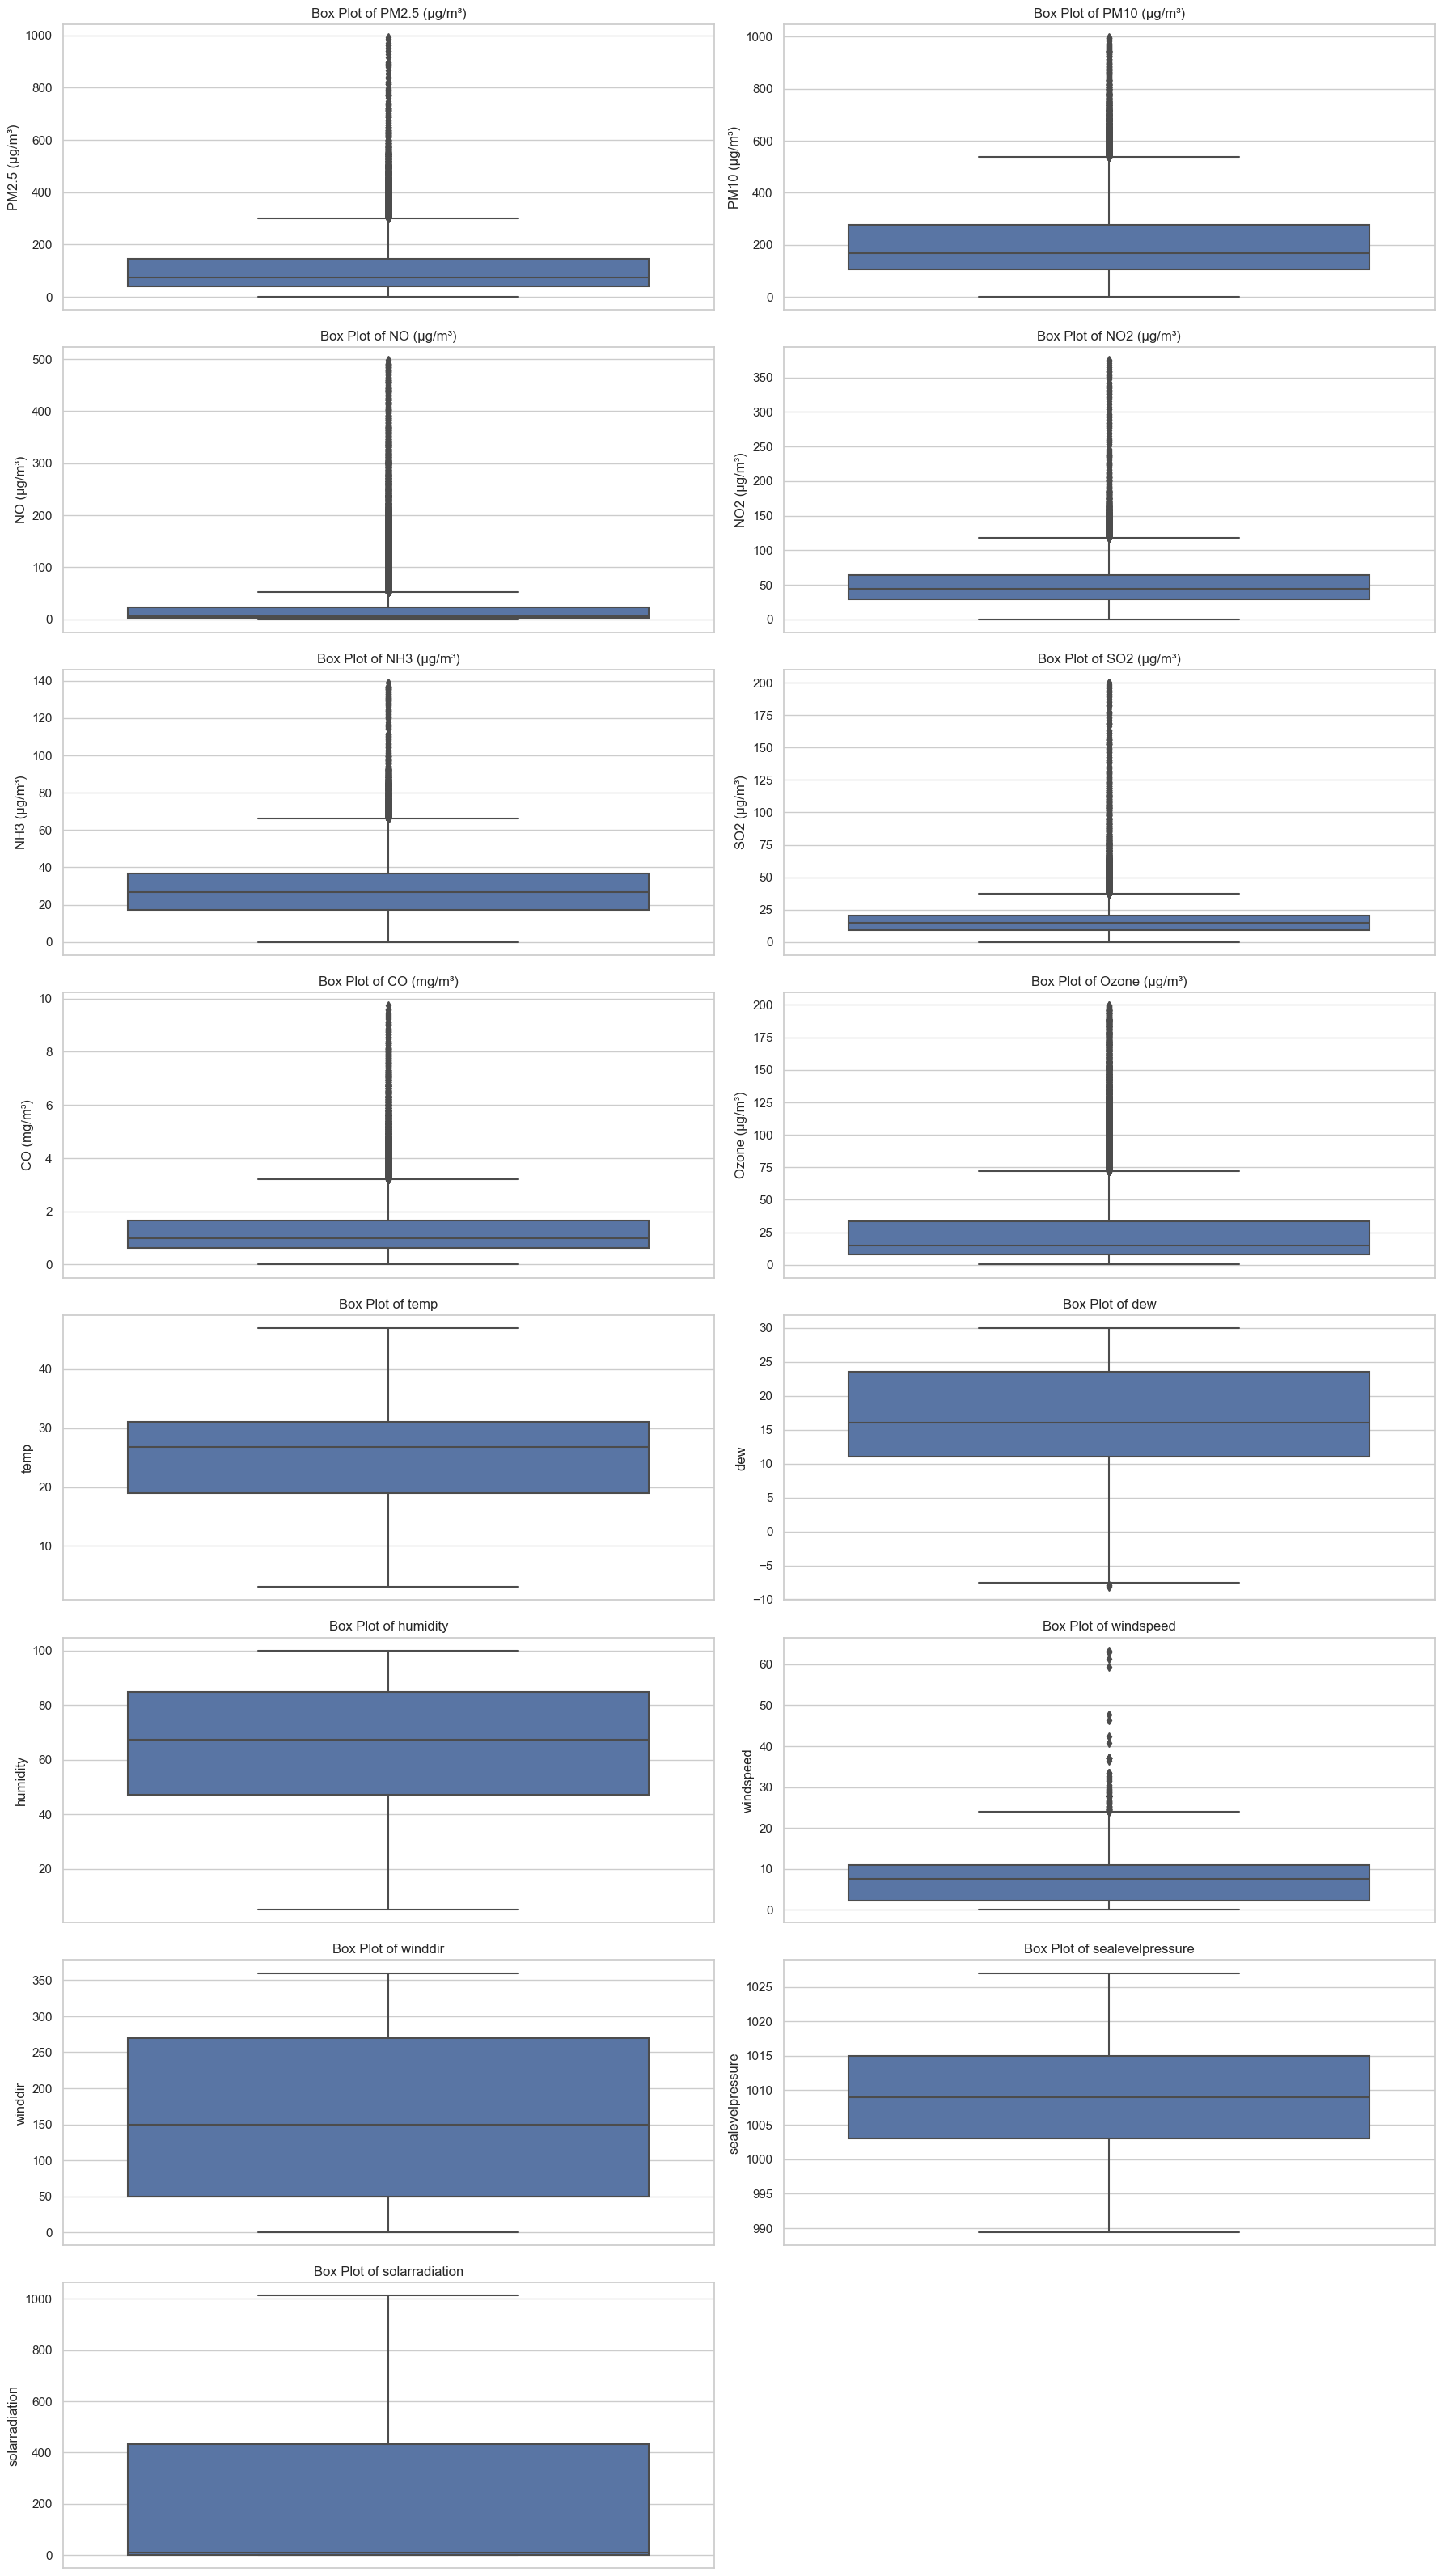

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the variables of interest for pollutants and weather data
pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)' ]
weather_data = ['temp','dew', 'humidity','windspeed', 'winddir','sealevelpressure','solarradiation']

plt.figure(figsize=(18, 36))  # Adjust the figure size as needed

# Histograms
for i, variable in enumerate(pollutants + weather_data, 1):
    plt.subplot(9, 2, i)  # 9 rows and 2 columns for the subplot grid
    sns.histplot(data_1[variable], kde=True, color='blue')
    plt.title(f'Distribution of {variable}')
plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(18, 36))  # Adjust the figure size as needed
for i, variable in enumerate(pollutants + weather_data, 1):
    plt.subplot(9, 2, i)  # 9 rows and 2 columns for the subplot grid
    sns.boxplot(y=data_1[variable])
    plt.title(f'Box Plot of {variable}')
plt.tight_layout()
plt.show()

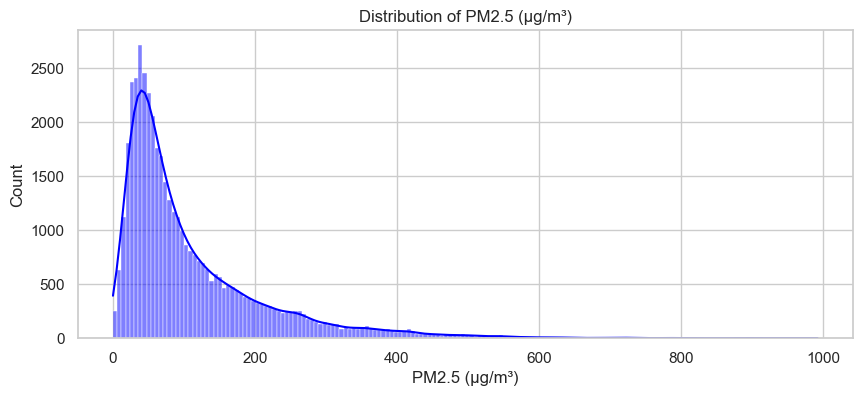

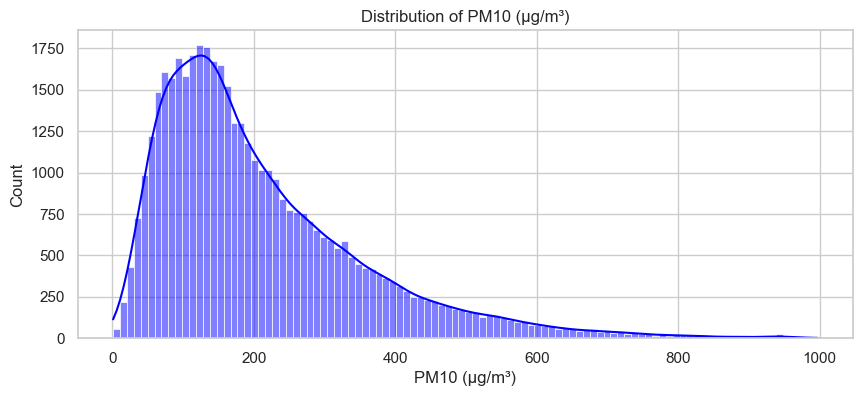

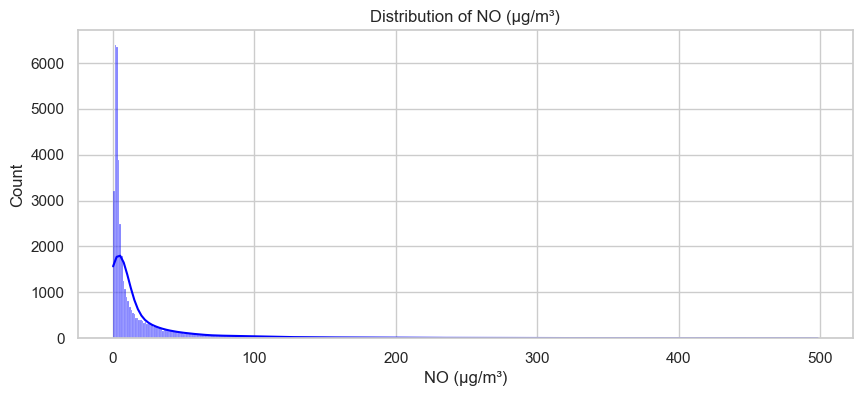

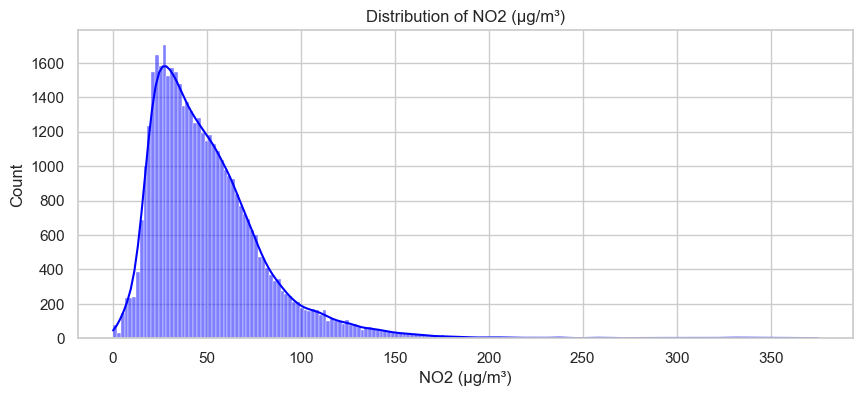

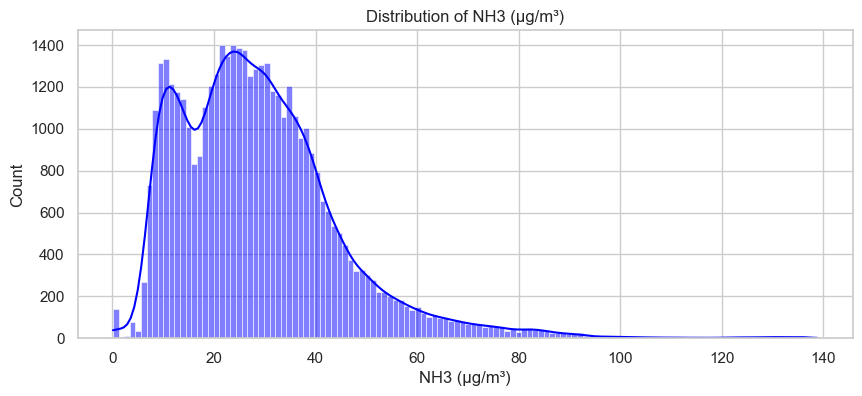

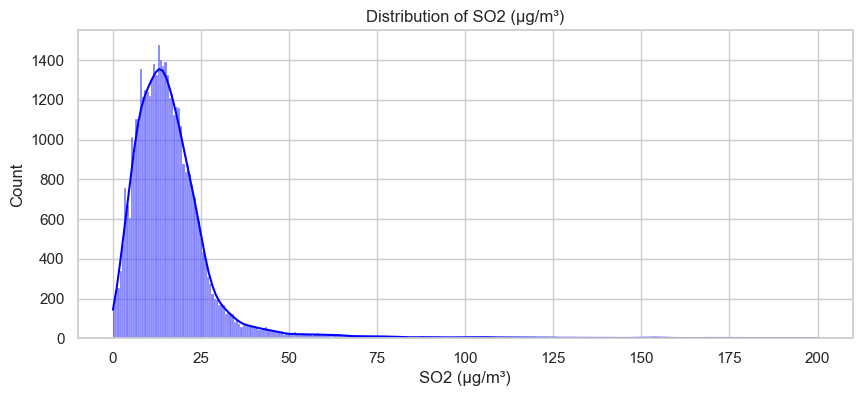

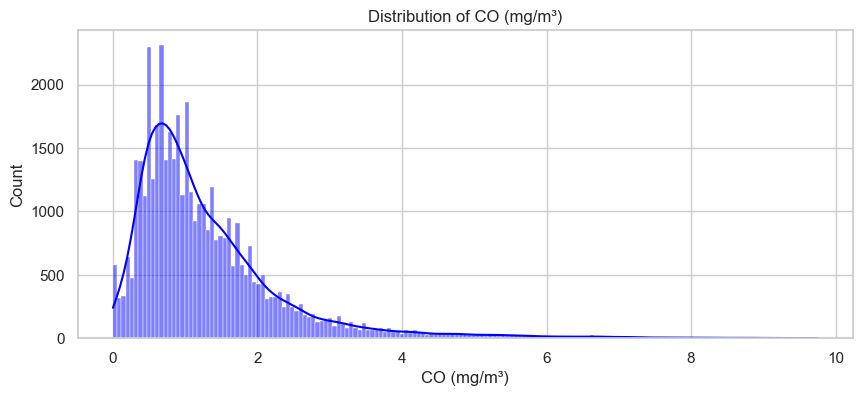

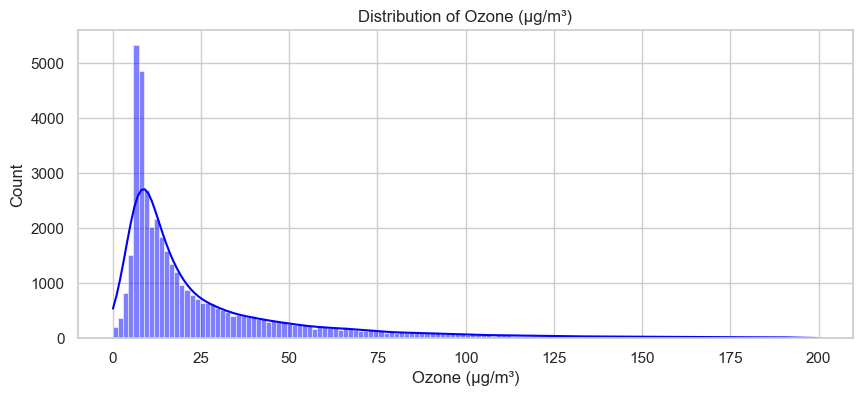

In [28]:
## Checking the Distribution of the pollutants
import matplotlib.pyplot as plt
import seaborn as sns

pollutants = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)']

for pollutant in pollutants:
    plt.figure(figsize=(10, 4))
   
    sns.histplot(data_1[pollutant], kde=True, color='blue')
    plt.title(f'Distribution of {pollutant}')

    
    plt.show()


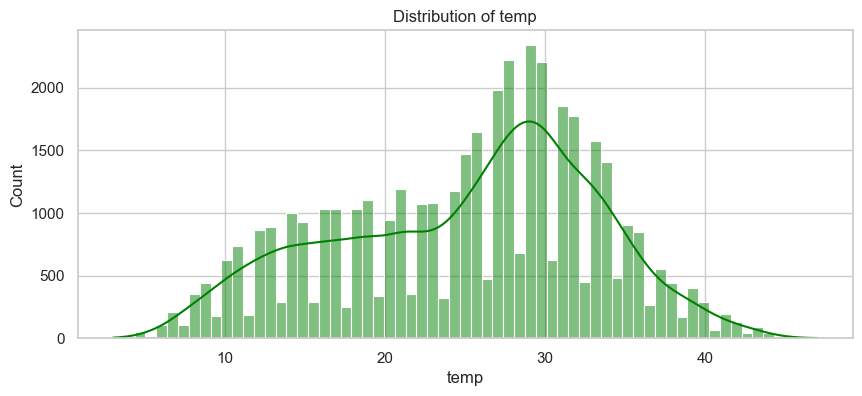

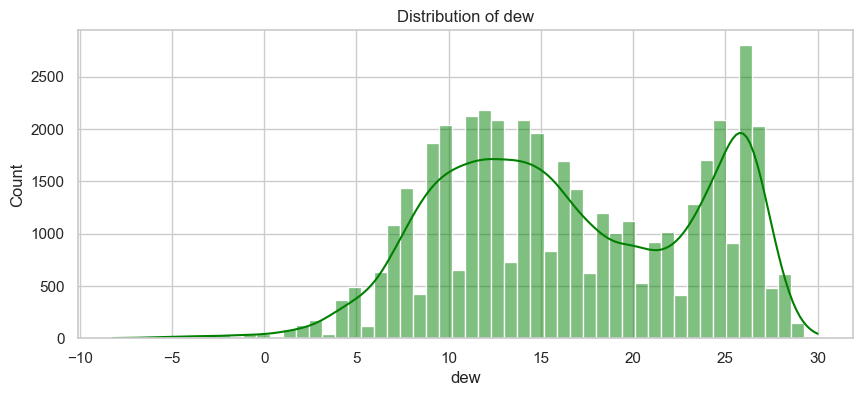

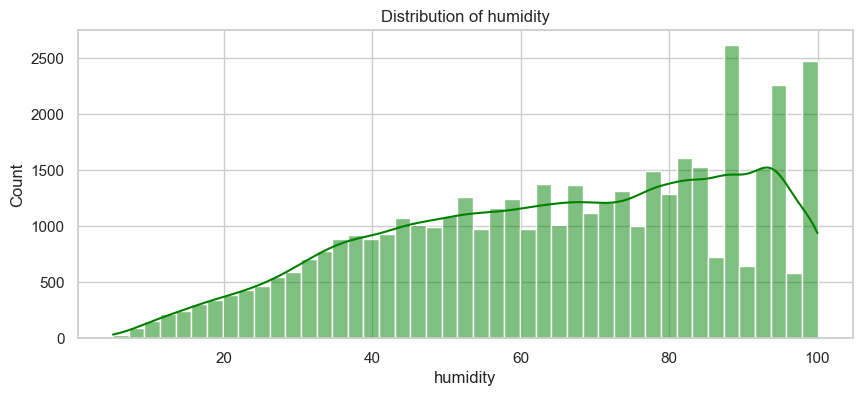

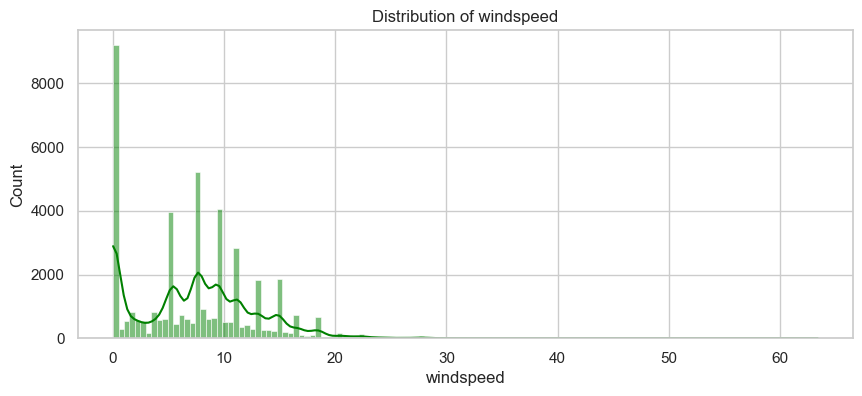

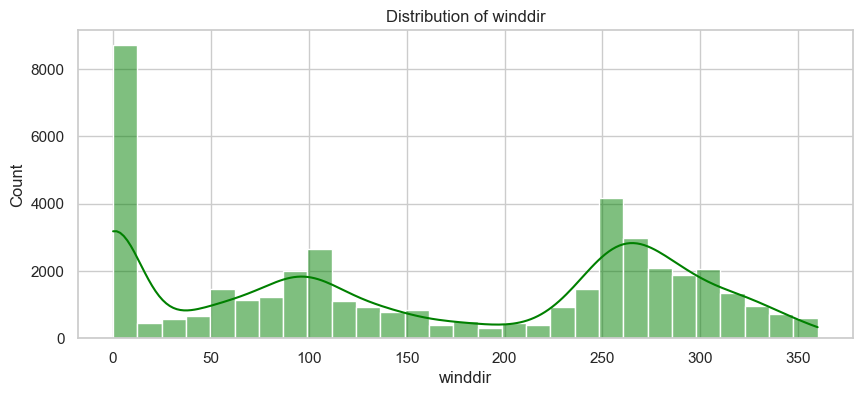

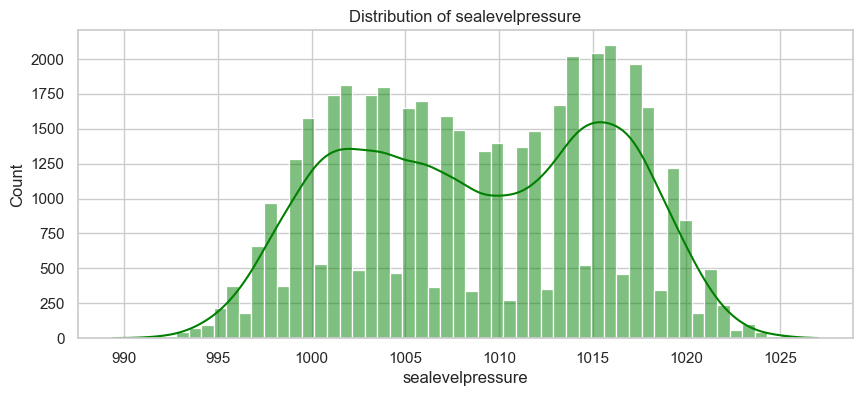

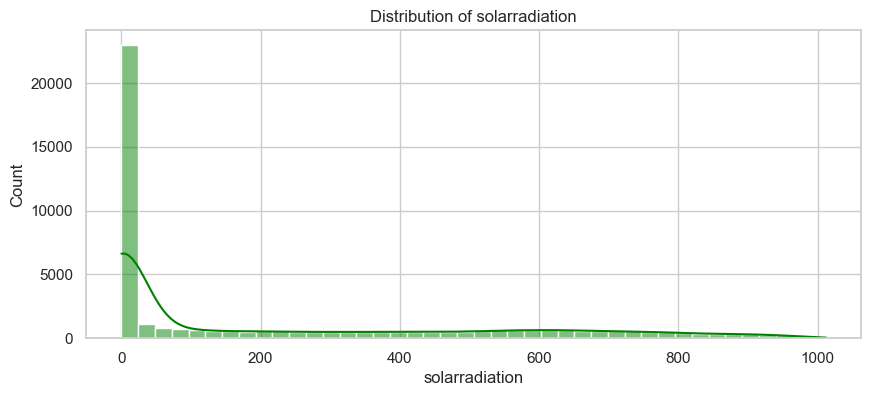

In [29]:
weather_data = ['temp','dew', 'humidity','windspeed', 'winddir','sealevelpressure','solarradiation']
## Checking the Distribution of the weather conditions
import matplotlib.pyplot as plt
import seaborn as sns

for weather in weather_data:
    plt.figure(figsize=(10, 4))
   
    sns.histplot(data_1[weather], kde=True, color='green')
    plt.title(f'Distribution of {weather}')

    
    plt.show()
    


#### Detecting Outliers

In [31]:
# Obtaining Outliers using IQR for PM10
Q1 = data_1['PM10 (µg/m³)'].quantile(0.25)
Q3 = data_1['PM10 (µg/m³)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_pm10 = data_1['PM10 (µg/m³)'][(data_1['PM10 (µg/m³)']< lower_bound) | data_1['PM10 (µg/m³)'] > upper_bound]

print("The Outliers for PM10 (µg/m³) :")
print(outliers_pm10)

# Obtaining Outliers using IQR for PM2.5
Q1 = data_1['PM2.5 (µg/m³)'].quantile(0.25)
Q3 = data_1['PM2.5 (µg/m³)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_pm25 = data_1['PM2.5 (µg/m³)'][(data_1['PM2.5 (µg/m³)']< lower_bound) | data_1['PM2.5 (µg/m³)'] > upper_bound]

print("The Outliers for 'PM2.5 (µg/m³) :")
print(outliers_pm25)

# Obtaining Outliers using IQR for  NO2
Q1 = data_1['NO2 (µg/m³)'].quantile(0.25)
Q3 = data_1['NO2 (µg/m³)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_NO2 = data_1['NO2 (µg/m³)'][(data_1['NO2 (µg/m³)']< lower_bound) | data_1['NO2 (µg/m³)'] > upper_bound]

print("The Outliers for NO2 (µg/m³) :")
print(outliers_NO2)


# Obtaining Outliers using IQR for  NO
Q1 = data_1['NO (µg/m³)'].quantile(0.25)
Q3 = data_1['NO (µg/m³)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_NO = data_1['NO (µg/m³)'][(data_1['NO (µg/m³)']< lower_bound) | data_1['NO (µg/m³)'] > upper_bound]

print("The Outliers for NO (µg/m³) :")
print(outliers_NO)


# Obtaining Outliers using IQR for NH3 (µg/m³)
Q1 = data_1['NH3 (µg/m³)'].quantile(0.25)
Q3 = data_1['NH3 (µg/m³)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_NH3 = data_1['NH3 (µg/m³)'][(data_1['NH3 (µg/m³)']< lower_bound) | data_1['NH3 (µg/m³)'] > upper_bound]

print("The Outliers for NH3 (µg/m³) :")
print(outliers_NH3)

# Obtaining Outliers using IQR for NH3 (µg/m³)
Q1 = data_1['SO2 (µg/m³)'].quantile(0.25)
Q3 = data_1['SO2 (µg/m³)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_SO2 = data_1['SO2 (µg/m³)'][(data_1['SO2 (µg/m³)']< lower_bound) | data_1['SO2 (µg/m³)'] > upper_bound]

print("The Outliers for SO2 (µg/m³) :")
print(outliers_SO2)

# Obtaining Outliers using IQR for CO
Q1 = data_1['CO (mg/m³)'].quantile(0.25)
Q3 = data_1['CO (mg/m³)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_CO = data_1['CO (mg/m³)'][(data_1['CO (mg/m³)']< lower_bound) | data_1['CO (mg/m³)'] > upper_bound]

print("The Outliers for CO (mg/m³) :")
print(outliers_CO)


# Obtaining Outliers using IQR for Ozone
Q1 = data_1['Ozone (µg/m³)'].quantile(0.25)
Q3 = data_1['Ozone (µg/m³)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_Ozone = data_1['Ozone (µg/m³)'][(data_1['Ozone (µg/m³)']< lower_bound) | data_1['Ozone (µg/m³)'] > upper_bound]

print("The Outliers for Ozone (µg/m³) :")
print(outliers_Ozone)



The Outliers for PM10 (µg/m³) :
Series([], Name: PM10 (µg/m³), dtype: float64)
The Outliers for 'PM2.5 (µg/m³) :
Series([], Name: PM2.5 (µg/m³), dtype: float64)
The Outliers for NO2 (µg/m³) :
Series([], Name: NO2 (µg/m³), dtype: float64)
The Outliers for NO (µg/m³) :
Series([], Name: NO (µg/m³), dtype: float64)
The Outliers for NH3 (µg/m³) :
Series([], Name: NH3 (µg/m³), dtype: float64)
The Outliers for SO2 (µg/m³) :
Series([], Name: SO2 (µg/m³), dtype: float64)
The Outliers for CO (mg/m³) :
Series([], Name: CO (mg/m³), dtype: float64)
The Outliers for Ozone (µg/m³) :
Series([], Name: Ozone (µg/m³), dtype: float64)


### FEATURE ENGINEERING WITH MOVING AVERAGE

In [32]:

rolling_data=data_1.copy()


# For Ozone 
rolling_data['Ozone_8hr_avg'] = rolling_data['Ozone (µg/m³)'].rolling(window=8, min_periods=1).mean()

# For CO 
rolling_data['CO_8hr_avg'] = rolling_data['CO (mg/m³)'].rolling(window=8, min_periods=1).mean()

#FOR PM10
rolling_data['PM10_24hr_avg'] = rolling_data['PM10 (µg/m³)'].rolling(window=24, min_periods=16).mean()

#FOR PM2.5
rolling_data['PM25_24hr_avg'] = rolling_data['PM2.5 (µg/m³)'].rolling(window=24, min_periods=16).mean()

#FOR SO2
rolling_data['SO2_24hr_avg'] = rolling_data['SO2 (µg/m³)'].rolling(window=24, min_periods=16).mean()

#FOR NO2
rolling_data['NO2_24hr_avg'] = rolling_data['NO2 (µg/m³)'].rolling(window=24, min_periods=16).mean()

#FOR NH3
rolling_data['NH3_24hr_avg'] = rolling_data['NH3 (µg/m³)'].rolling(window=24, min_periods=16).mean()


In [33]:
rolling_data.isna().sum()

Timestamp            0
PM2.5 (µg/m³)        0
PM10 (µg/m³)         0
NO (µg/m³)           0
NO2 (µg/m³)          0
NOx (ppb)            0
NH3 (µg/m³)          0
SO2 (µg/m³)          0
CO (mg/m³)           0
Ozone (µg/m³)        0
temp                 0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
conditions           0
icon                 0
Ozone_8hr_avg        0
CO_8hr_avg           0
PM10_24hr_avg       15
PM25_24hr_avg       15
SO2_24hr_avg        15
NO2_24hr_avg        15
NH3_24hr_avg        15
dtype: int64

In [34]:
rolling_data_1=rolling_data.copy()
rolling_data_1=rolling_data_1.dropna()
rolling_data_1.isna().sum()


Timestamp           0
PM2.5 (µg/m³)       0
PM10 (µg/m³)        0
NO (µg/m³)          0
NO2 (µg/m³)         0
NOx (ppb)           0
NH3 (µg/m³)         0
SO2 (µg/m³)         0
CO (mg/m³)          0
Ozone (µg/m³)       0
temp                0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
conditions          0
icon                0
Ozone_8hr_avg       0
CO_8hr_avg          0
PM10_24hr_avg       0
PM25_24hr_avg       0
SO2_24hr_avg        0
NO2_24hr_avg        0
NH3_24hr_avg        0
dtype: int64

### AQI CALCULATION

In [35]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

rolling_data_1['PM10_subindex'] = rolling_data_1['PM10_24hr_avg'].apply(lambda x: get_PM10_subindex(x))

In [36]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

rolling_data_1['PM2.5_subindex'] = rolling_data_1['PM25_24hr_avg'].apply(lambda x: get_PM25_subindex(x))



In [37]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

rolling_data_1['SO2_subindex'] = rolling_data_1['SO2_24hr_avg'].apply(lambda x: get_SO2_subindex(x))

In [38]:
## NO2 Sub-Index calculation
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

rolling_data_1["NO2_SubIndex"] = rolling_data_1["NO2_24hr_avg"].apply(lambda x: get_NO2_subindex(x))



In [39]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

rolling_data_1["NH3_SubIndex"] = rolling_data_1["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))



In [40]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

rolling_data_1["CO_SubIndex"] = rolling_data_1["CO_8hr_avg"].apply(lambda x: get_CO_subindex(x))



In [41]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

rolling_data_1["O3_SubIndex"] = rolling_data_1["Ozone_8hr_avg"].apply(lambda x: get_O3_subindex(x))



In [42]:
# Calculating the AQI as the maximum of the sub-indices
rolling_data_1['AQI'] = rolling_data_1[['PM2.5_subindex', 'PM10_subindex', 'SO2_subindex', 
                                                'NO2_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex']].max(axis=1)

In [43]:
# Identifying the pollutant responsible for the AQI value and removing '_subindex' from the result
rolling_data_1['Dominant_Pollutant'] = rolling_data_1[['PM2.5_subindex', 'PM10_subindex', 'SO2_subindex', 
                                                               'NO2_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'
                                                              ]].idxmax(axis=1).str.replace('_subindex', '', case=False)

#### Further Feature Engineering

In [44]:
data_2=rolling_data_1.copy()

# Extracting Time Components
data_2['Date'] = data_2['Timestamp'].dt.date
data_2['Time'] = data_2['Timestamp'].dt.time
data_2['Day'] = data_2['Timestamp'].dt.day
data_2['Month'] = data_2['Timestamp'].dt.month
data_2['Year'] = data_2['Timestamp'].dt.year
data_2['DayOfWeek'] = data_2['Timestamp'].dt.dayofweek    
data_2['DayName'] = data_2['Timestamp'].dt.day_name()  



# Show the head of the DataFrame to verify
data_2[['Timestamp', 'Date', 'Time', 'Day','DayOfWeek','DayName', 'Month', 'Year']].head()



Timestamp        Date      Time  Day  DayOfWeek  DayName  Month  \
15 2019-01-01 15:00:00  2019-01-01  15:00:00    1          1  Tuesday      1   
16 2019-01-01 16:00:00  2019-01-01  16:00:00    1          1  Tuesday      1   
17 2019-01-01 17:00:00  2019-01-01  17:00:00    1          1  Tuesday      1   
18 2019-01-01 18:00:00  2019-01-01  18:00:00    1          1  Tuesday      1   
19 2019-01-01 19:00:00  2019-01-01  19:00:00    1          1  Tuesday      1   

    Year  
15  2019  
16  2019  
17  2019  
18  2019  
19  2019

In [45]:
data_2 = data_2.reset_index(drop=True)

#Introducting Season
def month_to_season(month):
    
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5, 6]:
        return 'Summer'
    elif month in [7, 8, 9]:
        return 'Monsoon'
    elif month in [10, 11]:
        return 'Autumn'

# Applying the function to the DataFrame to create a 'Season' column
data_2['Season'] = data_2['Month'].apply(month_to_season)

data_2.head()


Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0 2019-01-01 15:00:00          98.75        213.50        0.28        30.75   
1 2019-01-01 16:00:00         107.75        231.75        0.65        34.70   
2 2019-01-01 17:00:00         104.75        229.75        2.05        41.60   
3 2019-01-01 18:00:00         160.00        318.25       17.82        58.43   
4 2019-01-01 19:00:00         235.50        439.25       58.22        94.20   

   NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  ...  \
0      16.58        35.88        23.00        0.80          62.65  ...   
1      19.00        35.50        18.93        0.75          36.75  ...   
2      23.82        36.57        18.93        1.22           9.72  ...   
3      45.65        38.85        19.17        3.10           6.60  ...   
4      97.57        41.57        21.98        5.33           6.35  ...   

          AQI  Dominant_Pollutant        Date      Time  Day  Month  Year  \
0  459.314904               PM2.5  2019-01-01  15:00:00    1      1  2019   
1  449.389140               PM2.5  2019-01-01  16:00:00    1      1  2019   
2  440.438034               PM2.5  2019-01-01  17:00:00    1      1  2019   
3  434.665992               PM2.5  2019-01-01  18:00:00    1      1  2019   
4  432.375000               PM2.5  2019-01-01  19:00:00    1      1  2019   

   DayOfWeek  DayName  Season  
0          1  Tuesday  Winter  
1          1  Tuesday  Winter  
2          1  Tuesday  Winter  
3          1  Tuesday  Winter  
4          1  Tuesday  Winter  

[5 rows x 53 columns]

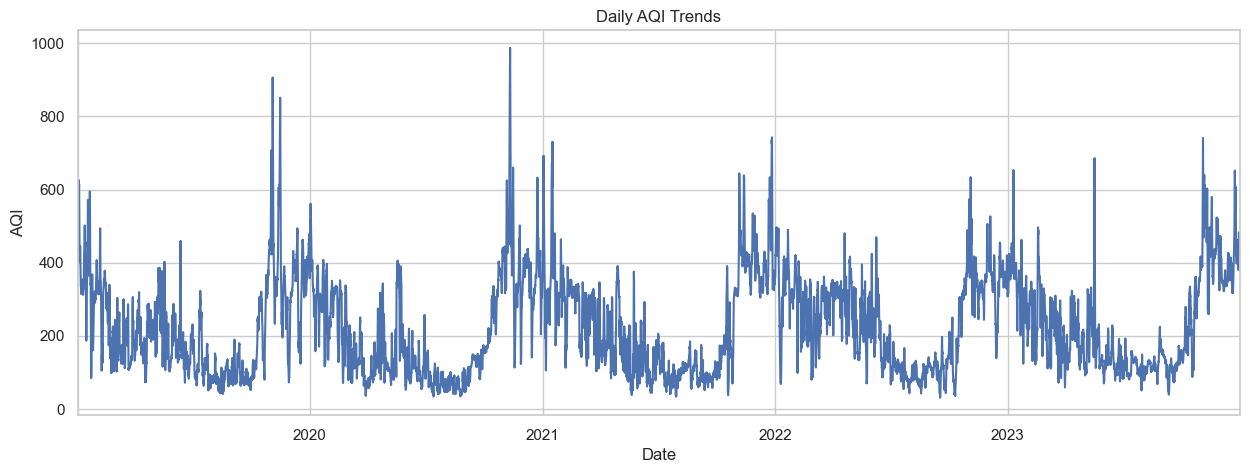

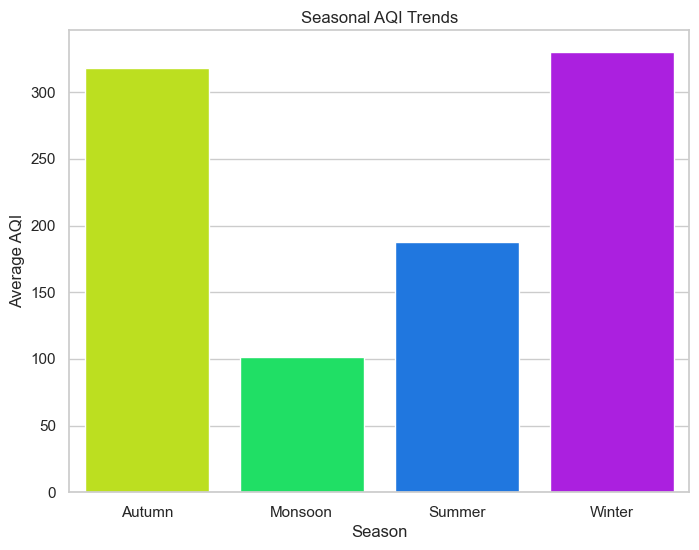

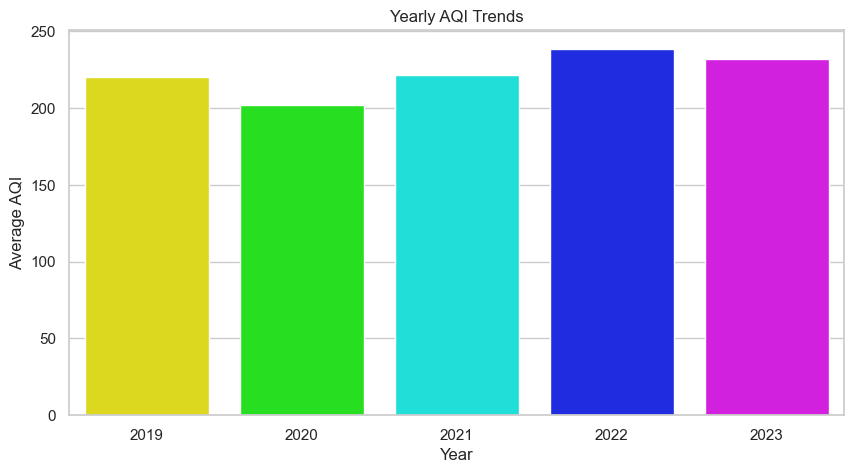

In [46]:
data_df=data_2.copy()

import pandas as pd
import matplotlib.pyplot as plt

data_df.set_index('Timestamp', inplace=True)  # Set the datetime column as the index

# Daily AQI Trends
plt.figure(figsize=(15,5))
data_df['AQI'].plot(title='Daily AQI Trends')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Seasonal Trends
seasonal_aqi = data_df.groupby('Season')['AQI'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Season', y='AQI', data=seasonal_aqi, palette='hsv')
plt.title('Seasonal AQI Trends')
plt.xlabel('Season')
plt.ylabel('Average AQI')
plt.show()

# Yearly Comparison
yearly_aqi = data_df.groupby('Year')['AQI'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='AQI', data=yearly_aqi, palette='hsv')
plt.title('Yearly AQI Trends')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.show()



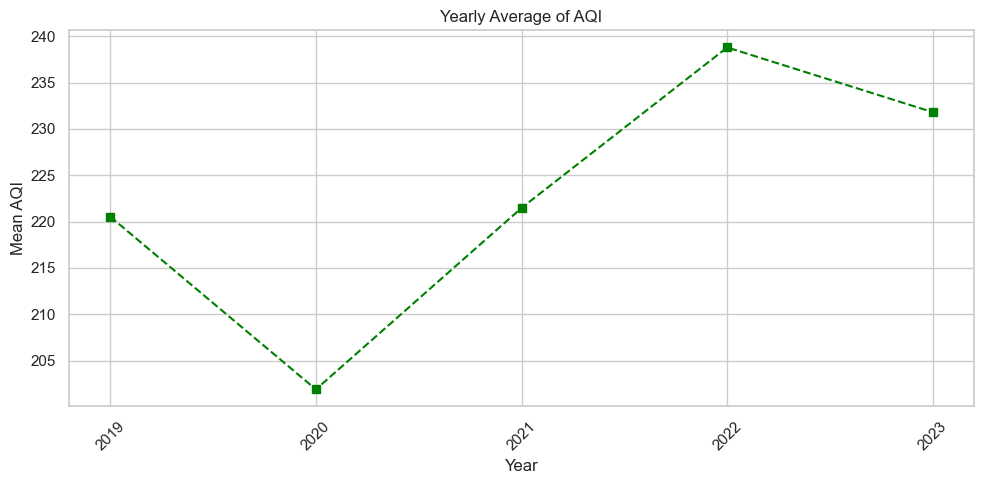

In [47]:
import matplotlib.pyplot as plt


# Grouping by year and calculating the mean AQI for each year
mean_aqi_by_year = data_df.groupby(data_df.index.year)['AQI'].mean()

# Plotting the yearly AQI averages
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
mean_aqi_by_year.plot(marker='s', color='green', linestyle='--', title='Yearly Average of AQI')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(ticks=range(data_df['Year'].min(), data_df['Year'].max() + 1))
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



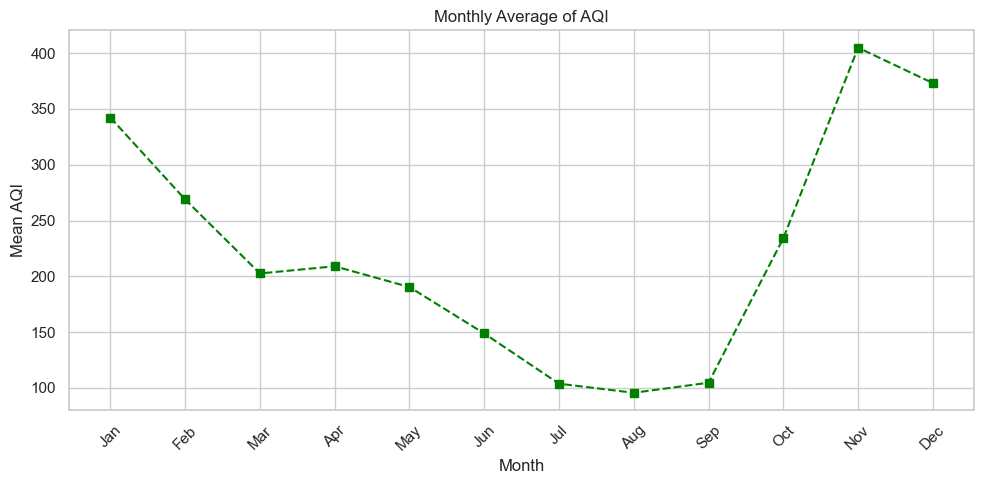

In [48]:
import matplotlib.pyplot as plt


# Grouping by month and calculating the mean AQI for each month
mean_aqi_by_month = data_df.groupby(data_df.index.month)['AQI'].mean()

# Plotting the monthly AQI averages
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
mean_aqi_by_month.plot(marker='s', color='green', linestyle='--', title='Monthly Average of AQI')
plt.xlabel('Month')
plt.ylabel('Mean AQI')
plt.grid(True)
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


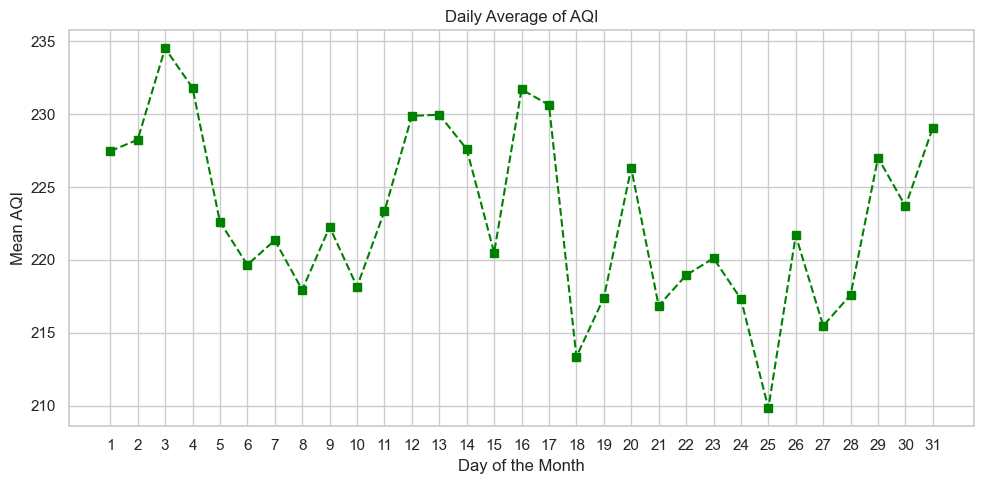

In [49]:
import matplotlib.pyplot as plt

# Group by day of the month and calculate the mean AQI for each day
mean_aqi_by_day = data_df.groupby(data_df.index.day)['AQI'].mean()

# Plotting the daily AQI averages
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
mean_aqi_by_day.plot(marker='s', color='green', linestyle='--', title='Daily Average of AQI')
plt.xlabel('Day of the Month')
plt.ylabel('Mean AQI')
plt.grid(True)
plt.xticks(ticks=range(1, 32), labels=range(1, 32))  # Set x-ticks to show every day of the month
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


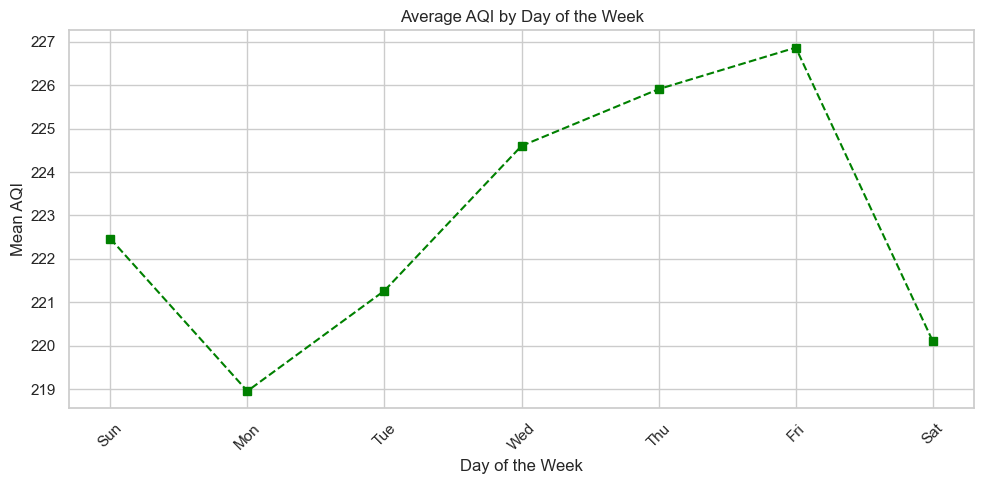

In [50]:
import matplotlib.pyplot as plt


# Create a series for the mean AQI by day of the week
mean_aqi_by_dow = data_df.groupby('DayOfWeek')['AQI'].mean()

# Days of the week starting with Sunday
dow = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Start plotting
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.plot(dow, mean_aqi_by_dow.loc[[6, 0, 1, 2, 3, 4, 5]].values, marker='s', color='green', linestyle='--')  # Reorder to start from Sunday
plt.title('Average AQI by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean AQI')
plt.grid(True)
plt.xticks(range(7), dow)
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


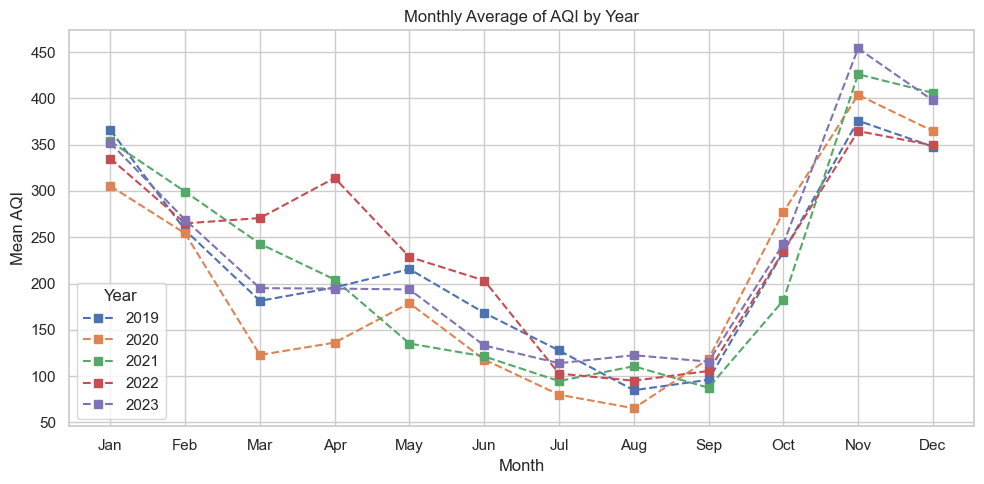

In [51]:
import matplotlib.pyplot as plt

# Get the unique years from the data to create a line for each
years = data_df.index.year.unique()

# Start plotting
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# Plot each year in a different line
for year in years:
    # Select the data for the year
    yearly_data = data_df[data_df.index.year == year]
    
    # Group by month within this year
    mean_aqi_by_month = yearly_data.groupby(yearly_data.index.month)['AQI'].mean()
    months = mean_aqi_by_month.index
    values = mean_aqi_by_month.values
    
    # Plotting
    plt.plot(months, values, marker='s', linestyle='--', label=str(year))

# Finalize plot details
plt.title('Monthly Average of AQI by Year')
plt.xlabel('Month')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Mean AQI')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


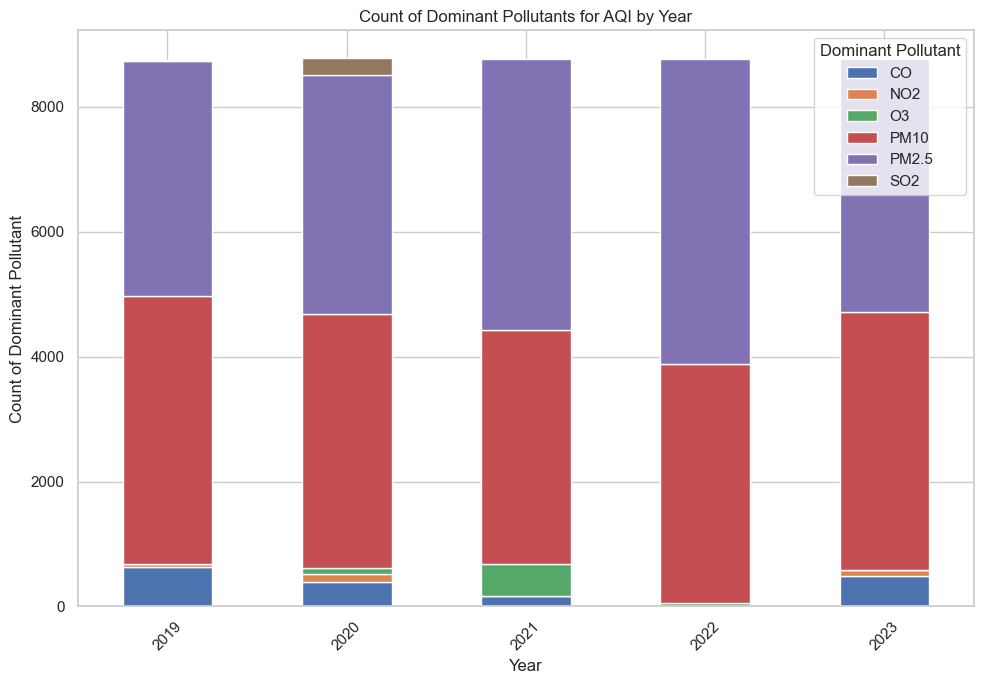

In [52]:
import matplotlib.pyplot as plt
dominantpollutant_aqi = data_df.groupby(['Year', 'Dominant_Pollutant'])['Dominant_Pollutant'].count()
# Create a DataFrame from your grouped data if it's not already in that form
dominant_pollutant_df = dominantpollutant_aqi.reset_index(name='Count')

# Pivot your data to get 'Year' as index and each 'Dominant_Pollutant' as a column
pollutant_pivot = dominant_pollutant_df.pivot(index='Year', columns='Dominant_Pollutant', values='Count')

# Plotting
pollutant_pivot.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Count of Dominant Pollutants for AQI by Year')
plt.xlabel('Year')
plt.ylabel('Count of Dominant Pollutant')
plt.legend(title='Dominant Pollutant')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


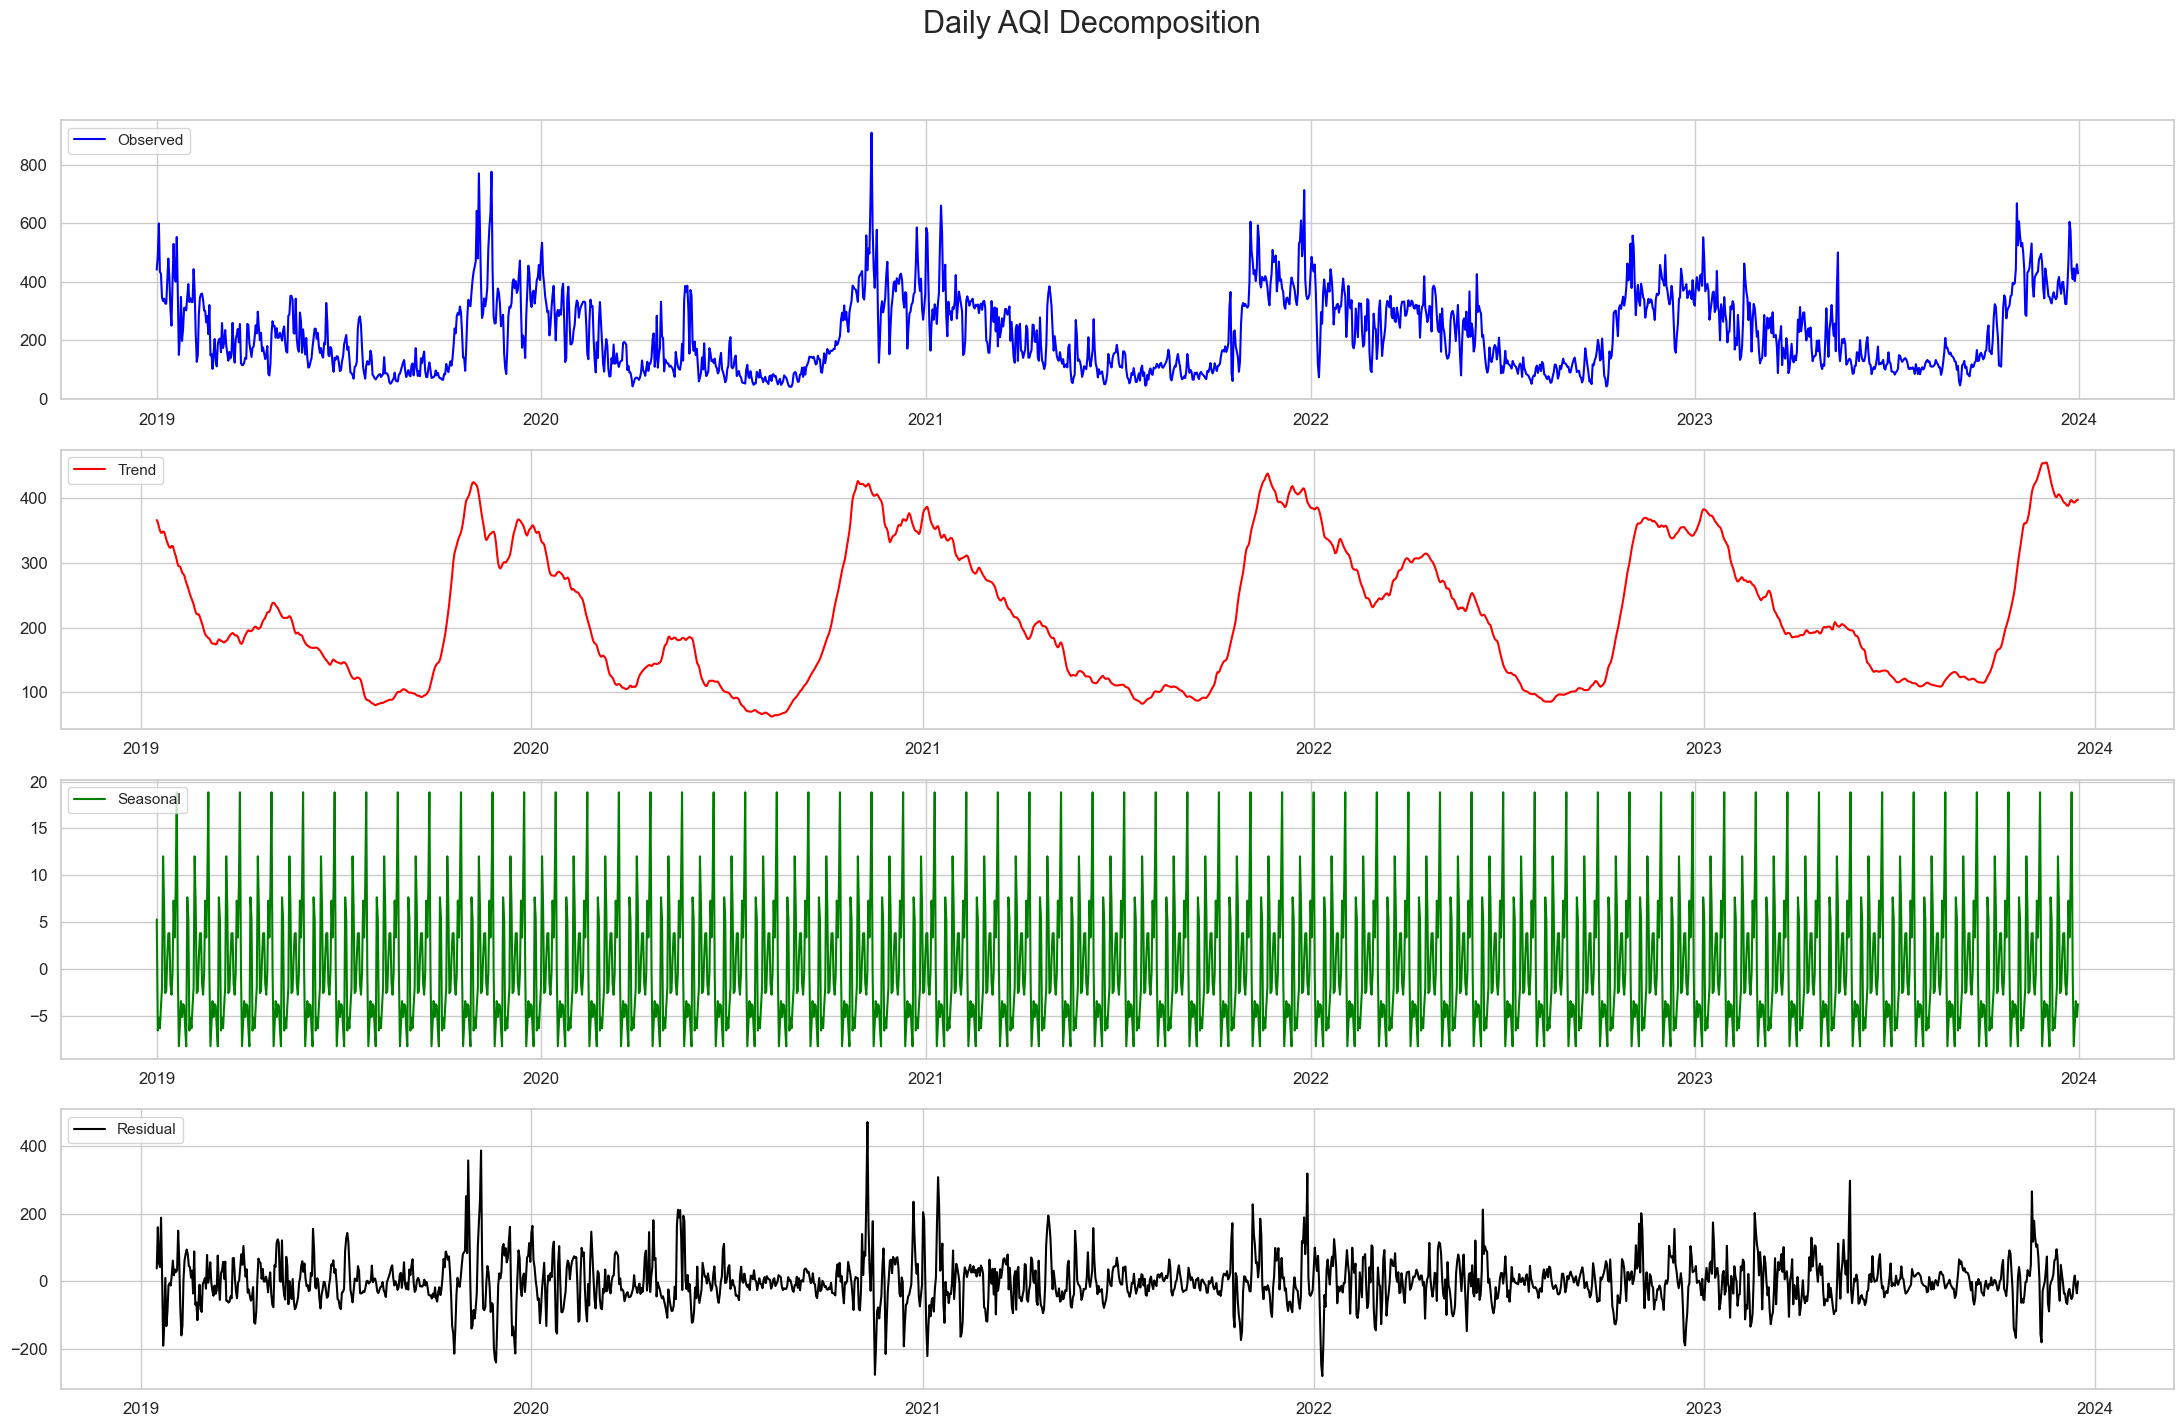

In [53]:
# Import necessary library for plotting time series of AQI
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.set_index('Date', inplace=True)

# Aggregating to daily AQI
daily_aqi = data_df['AQI'].resample('D').mean()

# Apply seasonal decomposition
decomposition = seasonal_decompose(daily_aqi, model='additive', period=30)

# Plot the decomposed components of the time series
plt.figure(figsize=(22, 15)) 
plt.suptitle('Daily AQI Decomposition', fontsize=22) 

# Plot the observed values
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=12)

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=12)

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=12)

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='black')
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=12)

# Adjust the layout to ensure there is no overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()
